![image_ALL_AML](https://github.com/harishmuh/Gene-Expression_Acute-Leukimia_MLClassification/blob/main/ALL%20vs%20AML.PNG?raw=true)

# **Gene Expression Data for Acute Leukimia Classification**



## **Problem and Business Understanding**

### **Context**

**Leukimia**

Leukimia is a type of cancer that affects blood and bone marrow (blood forming tissues). This cancer disrupts the normal function of the healthy blood cells that leads to the overproduction of abnormal white blood cells that crowd out healthy blood cells, which impairs the body's ability to fight infections and can interfere with the production of red blood cells and platelets.
According to the World Health Organization (WHO), leukemia accounts for 2.5% to 3% of all cancer deaths globally. In addition, Global Burden of Disease (GBD) Study 2020 estimates that around 310,000 deaths annually due to leukemia worldwide. The mortality rate of this cancer varies significantly by region and limited access to healthcare facilities often leads to higher mortality rates due to late diagnosis and inadequate treatment.

**Hematopoietic stem cell**

Hematopoietic stem cell is an immature cell that can develop into all type of blood cells, including white blood cells. Hematopoietic stem cells are found in the peripheral blood and the bone marrow. Based on the origins of hematopoietic cells, acute leukimia can be divided into AML (Acute Myeloid Leukimia) and ALL (Acute Lymphoblastic Leukimia).

![hematopoietic stem cell](https://nci-media.cancer.gov/pdq/media/images/526219-571.jpg)

[Hematopietic cell - National Institute of Health](https://www.cancer.gov/publications/dictionaries/cancer-terms/def/hematopoietic-stem-cell)

**AML**
* Associated with high expression of genes related to myeloid cells, which are cells that normally turn into red blood cells, platelets, and some types of white blood cells (like neutrophils).
* The leukemia cells are myeloblasts, which may have special features like Auer rods (tiny needle-like structures seen under a microscope).

**ALL**
* Characterized by genes expressed in the lymphoid cells, which are cells that normally turn into lymphocytes (a type of white blood cell that helps fight infections and builds immunity).
* The leukemia cells are lymphoblasts, which are simpler-looking cells without special features like Auer rods.

**Clinical presentation of ALL and AML**

| **Feature**                 | **ALL (Acute Lymphoblastic Leukemia)**                                | **AML (Acute Myeloid Leukemia)**                                 |
|-----------------------------|----------------------------------------------------------------------|-----------------------------------------------------------------|
| **Age group**               | Common in children and teenagers.                                   | Common in adults, especially older adults.                     |
| **Lymph node swelling**     | More common, noticeable in the neck, underarms, or groin.            | Rarely significant.                                             |
| **Bone pain**               | Often severe, especially in large bones (e.g., legs, arms).          | Less common and less specific.                                  |
| **Bleeding and bruising**   | Occurs but usually less severe.                                      | More severe; includes frequent gum bleeding and skin spots.     |
| **CNS involvement**         | Can involve brain or spinal cord, causing headaches or seizures.     | Rare at diagnosis.                                              |
| **Gum involvement**         | Rarely affected.                                                    | Can cause gum swelling or bleeding.                             |
| **Skin changes**            | Rarely causes skin changes.                                         | May cause lumps or reddish spots under the skin (leukemia cutis). |


**Challenges in differentiating ALL and AML**
  
The appearance and symptoms of ALL and AML are highly similar. Both types share some clinical features, but they differ fundamentally in terms of cellular origin, progression, treatment protocols, and prognosis. These ALL and AML can present with similar symptoms such as fatigue, frequent infections, fever, bleeding, bruising, and pallor (caused by anemia, low platelets, or dysfunctional white blood cells). Unfortunately, the cure rate is remarkably diminished when ALL therapy is used for AML. Chemotherapy for ALL requires chemical substances that different with AML. In addition,  Thus, accurate distinction of acute leukemias is crucial for successful treatment. Since the mere inspection of the appearance of acute leukemias for classification has significant limitations, more systematic approach of gene expression monitoring is used.


**Microarray Gene Expression Data**

Microarray technology offers a high-throughput, comprehensive snapshot of gene expression levels in cells. AML and ALL origins from distinct blood cell lineages—myeloid and lymphoid progenitors, which express different sets of genes. Microarray analysis can capture these molecular differences, providing a more objective basis for classification.

### **Objective**
* To build prediction model based on the gene expression dataset (from DNA microarray) for classifying acute leukemia patients into two classes, acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL).

### **Analytical Approach and Measurement Metrics**

We want to analyze data to learn about pattern that can differentiate which patients who are more likely to have ALL and who are more likely to have AML based on gene expression data from DNA microarray. Furthermore, we want to build binary classification model that can help distinguish ALL and AML using gene expression data. In this case, we want to focus on classification metric such as accuracy as both class of ALL and AML have similar importance. Accuracy itself can be defined as the ratio of correctly predicted instances to total instances. However, as the dataset tend to moderately imbalance, we will also employ ROC-AUC curve/score metric for additional evaluation criteria and minimize bias.



## **Data Understanding, Data Cleaning, and EDA**

### **Data Source**

* The dataset is originated based on scientific publication by [Golub et.al](https://pubmed.ncbi.nlm.nih.gov/10521349/) "Molecular Classification of Cancer: Class Discovery and Class Prediction by Gene Expression Monitoring".
* These datasets contain gene expression measurements corresponding to ALL and AML samples obtained from Bone Marrow and Peripheral Blood of 72 patients. The RNA was extracted from bone marrow for microarray analysis (focused on gene expression which is reflected in RNA)
* Initially, there were 3 datasets containing training and testing datasets, and a dataset consisting of the labels.


In [ ]:
# Installing library
!pip install category_encoders
!pip install catboost
!pip install Lime
!pip install feature_engine # winsorizer
# All library above is not available in google colab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=95bbeca84ff37338da2f165e2d203903c81aeb768157bc9c05ba5732fdab0c17
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built Lime
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 8.2 MB/s eta 0:00:00


In [ ]:
# Importing required libraries

# Libray for data wrangling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Statistics
from scipy.stats import normaltest
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Machine Learning Models library
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Preprocessing, Hyperparameter Tunning, and metrics
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.decomposition import PCA
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from scipy.stats.mstats import winsorize
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

# ML Interpretation and Explanation Model
from sklearn.tree import plot_tree
from lime import lime_tabular
import shap

# Other library
import warnings
warnings.filterwarnings('ignore')

# Customizing with 'ggplot' style
plt.style.use('ggplot')

In [ ]:
# Loading dataset

# Url
url_actual_label = 'https://raw.githubusercontent.com/harishmuh/Gene-Expression_Acute-Leukimia_MLClassification/refs/heads/main/actual.csv'
url_train = 'https://raw.githubusercontent.com/harishmuh/Gene-Expression_Acute-Leukimia_MLClassification/refs/heads/main/data_set_ALL_AML_train.csv'
url_test = 'https://raw.githubusercontent.com/harishmuh/Gene-Expression_Acute-Leukimia_MLClassification/refs/heads/main/data_set_ALL_AML_independent.csv'

# Load from url
df_actual = pd.read_csv(url_actual_label)
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

In [ ]:
# Displaying the dataset

display(df_actual.head(5), df_train.head(5), df_test.head(5))

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL


,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [ ]:
# Reviewing Data dimension
# Number of columns and rows
print(f' Number of columns and rows of df_actual: {df_actual.shape}')
print(f' Number of columns and rows of df_train: {df_train.shape}')
print(f' Number of columns and rows of df_test: {df_test.shape}')

 Number of columns and rows of df_actual: (72, 2)
 Number of columns and rows of df_train: (7129, 78)
 Number of columns and rows of df_test: (7129, 70)


In [ ]:
df_actual['cancer'].value_counts()

,count
cancer,
ALL,47
AML,25


### **Handling Missing Values**

In [ ]:
# Checking for missing values
# Calculating the number of missing values
display (df_actual.isnull().sum().to_frame(name="Missing Values df_actual"),
         df_train.isnull().sum().to_frame(name="Missing Values df_train"),
         df_test.isnull().sum().to_frame(name="Missing Values df_test")
        )

,Missing Values df_actual
patient,0
cancer,0


,Missing Values df_train
Gene Description,0
Gene Accession Number,0
1,0
call,0
2,0
...,...
call.35,0
32,0
call.36,0
33,0


,Missing Values df_test
Gene Description,0
Gene Accession Number,0
39,0
call,0
40,0
...,...
call.31,0
64,0
call.32,0
62,0


In [ ]:
# Checking and calculating missing values
print(f'Total missing values in target/label dataset: {df_actual.isna().sum().sum()}')
print(f'Total missing values in training dataset: {df_train.isna().sum().sum()}')
print(f'Total missing values in testing dataset: {df_test.isna().sum().sum()}')

Total missing values in target/label dataset: 0
Total missing values in training dataset: 0
Total missing values in testing dataset: 0


There were no missing values from the gene expression dataset.

### **Handling Duplicates**

In [ ]:
# Checking and calculating duplicates
print(f'Total duplicates in target/label dataset: {df_actual.duplicated().sum()}')
print(f'Total duplicates in training dataset: {df_train.duplicated().sum()}')
print(f'Total duplicates in testing dataset: {df_test.duplicated().sum()}')

Total duplicates in target/label dataset: 0
Total duplicates in training dataset: 0
Total duplicates in testing dataset: 0


In [ ]:
# Setting the target and replacing the value of label
# Machine learning needs the target to be numeric
y = df_actual.replace({'ALL':0, 'AML':1})
labels = ['ALL', 'AML'] # For plotting on graphs
display(y.head(3))

,patient,cancer
0,1,0
1,2,0
2,3,0


### **Feature selection**

In this step, we selected the usable features and removed unused features. All 'call' columns were removed since it did not posses useful information. Furthermore, we kept all gene expression values.

In [ ]:
# Removing 'call' columns from training and testing data frame
train_to_keep = [col for col in df_train.columns if "call" not in col]
test_to_keep = [col for col in df_test.columns if "call" not in col]

# Isolating only the usable features
df_train = df_train[train_to_keep]
df_test = df_test[test_to_keep]

# Displaying
display(df_train.head(3), df_test.head(3))



,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-57,136,124,-1,-125,2,-95,49,-37,-70


,Gene Description,Gene Accession Number,39,40,42,47,48,49,41,43,...,54,57,58,60,61,65,66,63,64,62
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,-87,22,-243,-130,-256,-62,86,...,-90,-137,-157,-172,-47,-62,-58,-161,-48,-176
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,-248,-153,-218,-177,-249,-23,-36,...,-87,-51,-370,-122,-442,-198,-217,-215,-531,-284
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,262,17,-163,-28,-410,-7,-141,...,102,-82,-77,38,-21,-5,63,-46,-124,-81


### **Data Arrangement**

In this step, we arrangged our train and test data by transposing columns and rows to match the total number of patients.

In [ ]:
# Rearranging the order of columns in the data frame

train_column_order =  ['Gene Description', 'Gene Accession Number', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38']

test_column_order = ['Gene Description', 'Gene Accession Number','39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53',  '54', '55', '56', '57', '58', '59',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72']

df_train = df_train.reindex(columns=train_column_order)
df_test = df_test.reindex(columns=test_column_order)

In [ ]:
# Display the new order
display(df_train.head(3),df_test.head(3))

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,29,30,31,32,33,34,35,36,37,38
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,15,-318,-32,-124,-135,-20,7,-213,-25,-72
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-114,-192,-49,-79,-186,-207,-100,-252,-20,-139
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,2,-95,49,-37,-70,-50,-57,136,124,-1


,Gene Description,Gene Accession Number,39,40,41,42,43,44,45,46,...,63,64,65,66,67,68,69,70,71,72
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,-87,-62,22,86,-146,-187,-56,...,-161,-48,-62,-58,-76,-154,-79,-55,-59,-131
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,-248,-23,-153,-36,-74,-187,-43,...,-215,-531,-198,-217,-98,-136,-118,-44,-114,-126
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,262,-7,17,-141,170,312,43,...,-46,-124,-5,63,-153,49,-30,12,23,-50


**Transposing columns and rows**

In [ ]:
# Transposing the columns
X_train = df_train.T
X_test = df_test.T

print(f'Number of columns and rows of X_train: {X_train.shape}')
display(X_train.head(3))

print(f'Number of columns and rows of X_test: {X_test.shape}')
display(X_test.head(3))

Number of columns and rows of X_train: (40, 7129)


,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37


Number of columns and rows of X_test: (36, 7129)


,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70


We will make the second row as the new column index, dropping the metadata which has non numeric values, and converting all remaining data into numerical data.

In [ ]:
# Data Arrangement

# Setting the column names to the values in the second row (index 1)
X_train.columns = X_train.iloc[1, :]
X_test.columns = X_test.iloc[1, :]

# Removing rows containing metadata and convert data to numeric
X_train = X_train.drop(index=["Gene Description", "Gene Accession Number"])
X_test = X_test.drop(index=["Gene Description", "Gene Accession Number"])

# Converting all remaining data to numeric
X_train = X_train.apply(pd.to_numeric)
X_test = X_test.apply(pd.to_numeric)

# Displaying the cleaned data
display(X_train.head(3), X_test.head(3))

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
41,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,129,383,46,104,15,245,164,84,100,-18


In [ ]:
# Data dimension
print(X_train.shape)
print(X_test.shape)

(38, 7129)
(34, 7129)


We have 38 rows represented the 38 patients for training set and 34 rows represented the 34 patients for testing set. Each rows has 7129 gene expression features. These 7129 features are too many for machine learning. We need to decrease the number of features for reducing curse of dimensionality

**Validate data**

We want to check whether the range of gene expression value under the usual range (0 to 20) (under transformed range)

In [ ]:
# Validate data

# Training dataset
min_value_train = np.min(X_train.values)
max_value_train = np.max(X_train.values)

# Testing dataset
min_value_test = np.min(X_test.values)
max_value_test = np.max(X_test.values)

print(f"Gen expression values of training data range from {min_value_train:.2f} to {max_value_test:.2f}")
print(f"Gen expression values of testing data range from {min_value_test:.2f} to {max_value_test:.2f}")

Gen expression values of training data range from -28400.00 to 71369.00
Gen expression values of testing data range from -26775.00 to 71369.00


In [ ]:
# Validate data # transformed
df_transformed_train = np.log2(X_train.values + 1 - X_train.values.min().min())
df_transformed_test = np.log2(X_test.values + 1 - X_test.values.min().min())

print("Transformed range on training data:", df_transformed_train.min().min(), "to", df_transformed_train.max().max())
print("Transformed range on testing data:", df_transformed_test.min().min(), "to", df_transformed_test.max().max())

Transformed range on training data: 0.0 to 16.451677979990393
Transformed range on testing data: 0.0 to 16.582627150970424


**Associating features and target**

We have not provide association of target labels and the right patient yet, so we will match it by resetting the index of X_train and X_test, and divide the y or target columns as well into y_train and y_test

In [ ]:
# Associating features and target

# Associating the first 38 patient's cancer types for training set
X_train = X_train.reset_index(drop=True)
y_train = y[y.patient <= 38].reset_index(drop=True)

# Associating the rest of patients for testing set
X_test = X_test.reset_index(drop=True)
y_test = y[y.patient > 38].reset_index(drop=True)

In [ ]:
# Descriptive analysis
X_train.describe()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,-120.868421,-150.526316,-17.157895,181.394737,-276.552632,-439.210526,-43.578947,-201.184211,99.052632,112.131579,...,178.763158,750.842105,8.815789,399.131579,-20.052632,869.052632,335.842105,19.210526,504.394737,-29.210526
std,109.555656,75.734507,117.686144,117.468004,111.004431,135.458412,219.482393,90.838989,83.178397,211.815597,...,84.826830,298.008392,77.108507,469.579868,42.346031,482.366461,209.826766,31.158841,728.744405,30.851132
min,-476.000000,-327.000000,-307.000000,-36.000000,-541.000000,-790.000000,-479.000000,-463.000000,-82.000000,-215.000000,...,30.000000,224.000000,-178.000000,36.000000,-112.000000,195.000000,41.000000,-50.000000,-2.000000,-94.000000
25%,-138.750000,-205.000000,-83.250000,81.250000,-374.250000,-547.000000,-169.000000,-239.250000,36.000000,-47.000000,...,120.000000,575.500000,-42.750000,174.500000,-48.000000,595.250000,232.750000,8.000000,136.000000,-42.750000
50%,-106.500000,-141.500000,-43.500000,200.000000,-263.000000,-426.500000,-33.500000,-185.500000,99.500000,70.500000,...,174.500000,700.000000,10.500000,266.000000,-18.000000,744.500000,308.500000,20.000000,243.500000,-26.000000
75%,-68.250000,-94.750000,47.250000,279.250000,-188.750000,-344.750000,79.000000,-144.750000,152.250000,242.750000,...,231.750000,969.500000,57.000000,451.750000,9.250000,1112.000000,389.500000,30.250000,487.250000,-11.500000
max,17.000000,-20.000000,265.000000,392.000000,-51.000000,-155.000000,419.000000,-24.000000,283.000000,561.000000,...,356.000000,1653.000000,218.000000,2527.000000,52.000000,2315.000000,1109.000000,115.000000,3193.000000,36.000000


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Columns: 7129 entries, AFFX-BioB-5_at to Z78285_f_at
dtypes: int64(7129)
memory usage: 2.1 MB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Columns: 7129 entries, AFFX-BioB-5_at to Z78285_f_at
dtypes: int64(7129)
memory usage: 1.8 MB


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   patient  72 non-null     int64
 1   cancer   72 non-null     int64
dtypes: int64(2)
memory usage: 1.3 KB


In [ ]:
display(y_train, y_test)

,patient,cancer
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


,patient,cancer
0,39,0
1,40,0
2,41,0
3,42,0
4,43,0
5,44,0
6,45,0
7,46,0
8,47,0
9,48,0


### **Data Distribution**

In [ ]:
# Normal test, skewness and data distribution

from scipy.stats import normaltest

alpha = 0.05
index = 1

dist_info = []
for feature_name in X_train.columns:
    stat, p_value = normaltest(X_train[feature_name].dropna())

    if p_value > alpha:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"

    skewness = X_train[feature_name].skew()

    if skewness > 0:
        skewness_type = "Right Skew"
    else:
        skewness_type = "Left Skew"

    dist_info.append([feature_name, stat, p_value, distribution, skewness, skewness_type])

distribution_info = pd.DataFrame(dist_info, columns=["Feature",
                                                     "D'Agostino-Pearson Statistic",
                                                     "P-value",
                                                     "Distribution",
                                                     "Skewness",
                                                     "Skewness Type"])

# Use lambda function to count the columns with normal_distributed_features
normal_distributed_features = sum(distribution_info["Distribution"].apply(lambda x: x == "Normally Distributed"))

# Calculate asymetric distribution
not_normal_distributed_features = len(X_train.columns) - normal_distributed_features

print(f'The total number of features with normal distribution and asymetric distribution are {normal_distributed_features} features and {not_normal_distributed_features} features')

distribution_info

The total number of features with normal distribution and asymetric distribution are 3879 features and 3250 features


,Feature,D'Agostino-Pearson Statistic,P-value,Distribution,Skewness,Skewness Type
0,AFFX-BioB-5_at,17.649720,1.470321e-04,Not Normally Distributed,-1.517897,Left Skew
1,AFFX-BioB-M_at,2.221980,3.292329e-01,Normally Distributed,-0.559021,Left Skew
2,AFFX-BioB-3_at,2.549140,2.795512e-01,Normally Distributed,0.453981,Right Skew
3,AFFX-BioC-5_at,6.111995,4.707575e-02,Not Normally Distributed,-0.182510,Left Skew
4,AFFX-BioC-3_at,1.271057,5.296554e-01,Normally Distributed,-0.222709,Left Skew
...,...,...,...,...,...,...
7124,X83863_at,8.838071,1.204585e-02,Not Normally Distributed,1.070252,Right Skew
7125,Z17240_at,20.939533,2.838168e-05,Not Normally Distributed,1.551995,Right Skew
7126,L49218_f_at,5.772584,5.578268e-02,Normally Distributed,0.425516,Right Skew
7127,M71243_f_at,36.476604,1.200069e-08,Not Normally Distributed,2.616494,Right Skew


### **Outliers**

In [ ]:
# Examining outliers presence

def outlier_percentage(X_train, column):
    Q1 = X_train[column].quantile(1/4)
    Q3 = X_train[column].quantile(3/4)
    iqr = Q3 - Q1
    outlier_lower_limit = Q1 - 1.5 * iqr
    outlier_upper_limit = Q3 + 1.5 * iqr
    num_of_outliers = len(X_train[(X_train[column] < outlier_lower_limit) | (X_train[column] > outlier_upper_limit)])
    outlier_percentage = round(num_of_outliers / len(X_train[column]) * 100, 2)
    return num_of_outliers, outlier_percentage, outlier_lower_limit, outlier_upper_limit

outliers = []

for i in X_train.columns:
    total_outliers, outliers_percent, lower_bound, upper_bound = outlier_percentage(X_train, i)
    outliers.append([i, total_outliers, outliers_percent, lower_bound, upper_bound])

outliers_info = pd.DataFrame(outliers, columns=["Columns", "Number of Outliers", "(%) of Outliers", "Lower bound", "Upper bound"])

# Use lambda function to count the columns with more than 5% outliers
high_outlier = sum(outliers_info["(%) of Outliers"].apply(lambda x: x > 5))

print(f'The total number of features with high percentage of outliers (more than 5% for each columns) were {high_outlier} features')

outliers_info


The total number of features with high percentage of outliers (more than 5% for each columns) were 2959 features


,Columns,Number of Outliers,(%) of Outliers,Lower bound,Upper bound
0,AFFX-BioB-5_at,5,13.16,-244.500,37.500
1,AFFX-BioB-M_at,0,0.00,-370.375,70.625
2,AFFX-BioB-3_at,2,5.26,-279.000,243.000
3,AFFX-BioC-5_at,0,0.00,-215.750,576.250
4,AFFX-BioC-3_at,0,0.00,-652.500,89.500
...,...,...,...,...,...
7124,X83863_at,1,2.63,-179.875,1887.125
7125,Z17240_at,4,10.53,-2.375,624.625
7126,L49218_f_at,5,13.16,-25.375,63.625
7127,M71243_f_at,4,10.53,-390.875,1014.125


There were about 2959 features that contain relatively high percentage of outliers (more than 5 %). The data contained some extreme values which need to be processed to make model more general.

### **Imbalance data check**

This step purposely to identify whether one class significantly outnumbers another in the dataset. The imbalanced data can bias machine learning models towards the majority class that leads to misleading results.

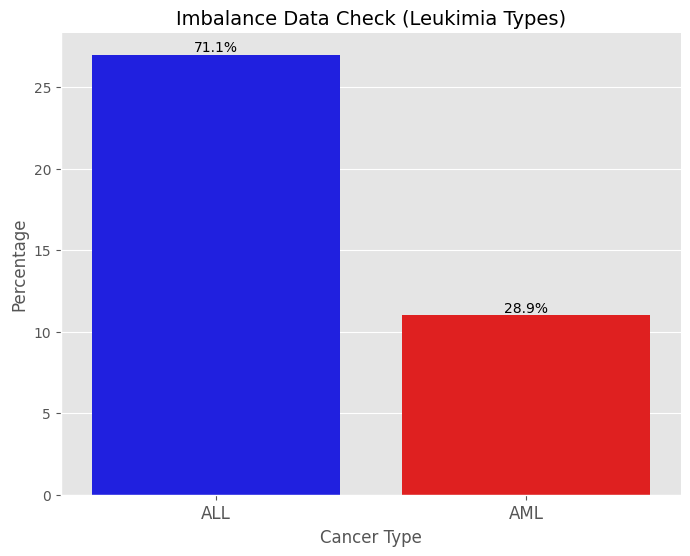

In [ ]:
# Imbalance data check

# Setting size
plt.figure(figsize=(8, 6))

# Create countplot
ax = sns.countplot(
    data=y_train,
    x="cancer",
    palette={'0': 'blue', '1': 'red'}  # Map 0 to blue and 1 to red
)

# Change x-axis labels
ax.set_xticklabels(['ALL', 'AML'], fontsize=12)

# Annotate bars with percentages
total = len(y_train)
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        percentage = f"{(height / total) * 100:.1f}%"  # Calculate percentage
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            percentage,
            ha="center",
            va="bottom",
            fontsize=10
        )

# Remove unnecessary spines for cleaner look
sns.despine()

# Add title and labels
ax.set_title("Imbalance Data Check (Leukimia Types)", fontsize=14)
ax.set_xlabel("Cancer Type", fontsize=12)
ax.set_ylabel("Percentage", fontsize=12)

plt.show()


According to the imbalance data check, it turned out there was imbalance data between label data ALL and AML (about 71.1%: 28.9%). This proportion considered as moderate imbalance case. Although it was not that severe, the imbalanced data can lead to a bias towards the majority class. That's why the data need to be pre-processed by a resampling technique before creating the classification model.

### **Summary of Data Understanding and EDA**

Based on our observation, we can get some understanding of the gene expression dataset as
* The dataset contains 72 rows (number of patients) and 7129 features. The high number of features can cause curse of dimensionality that potentially makes overfitting and inhibit generalization.
* Many features of the dataset have assymetric distribution (3250 features) and 2959 features contain high percentage of extreme values or outliers. These outliers need to be treated before generating machine learning models.
* There were no missing values and duplicate in the dataset. Thus, we can proceed without additional imputation.
* The target labels were not balanced as the proportion ALL and AML (about 71.1%: 28.9%). Therefore, we need to conduct resampling technique to prevent bias toward the major class.


## **Data Preprocessing and Modeling**

As our dataset contains too many features, we will use principal component analysis (PCA) for dimensional reduction technique (will be explained in the next sub-chapter PCA).
However, there are some requirements to conduct PCA properly such as all data must be in numeric daya type, the features should be on the same scale, and contains sufficient explained variance. Based on the machine learning models and PCA requirements, we will previously conduct data prepocessing before generating models.

The preprocessing steps consist of:
* Outlier handling (By winsorization)
* Scaling (By Robust Scaler)
* Oversampling (By SMOTE)


### **Outlier handling: Winsorization**

This steps is conducted to identify and address data points that extreme or deviate significantly from the rest of dataset or not representative of the population. Outliers need to be treated as these extreme values can degrade model performance.
Winsorization is one of outlier handling techniques by limiting extreme data values to reduce the influence of outliers. This technique caps the extreme outliers based on the interquartile range (IQR). We select this technique as we want to control the effect of outliers without removing data or by still preserving dataset size.

In [ ]:
# Initialize the Winsorizer
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5,  variables=list(X_train.columns))

# Fit and transform the training data
X_train_winsorized = winsorizer.fit_transform(X_train)

# Transforming the testing dataset
X_test_winsorized = winsorizer.transform(X_test)

### **Scaling**

Adjusting the features on the same scale is the requirements of PCA and machine learning model. We can do the step by performing scaling technique. Scaling is a process of transforming data so that features are on a comparable scale.
This process may improves performance of models that sensitive to feature magnitudes (e.g., some distance-based algorithms). In this step, we used robust scaler as this method uses median and interquartile range to reduce the impact of outliers. As the dataset contains high number of outliers, this method will be more robust to outliers than others scaling method like standard scaler or min-max scaler.

In [ ]:
# Scaling

# Robust scaler
scaler = RobustScaler()

# Scaling the training dataset
X_train_scaled = scaler.fit_transform(X_train_winsorized)

# Scaling the testing dataset
X_test_scaled = scaler.transform(X_test)

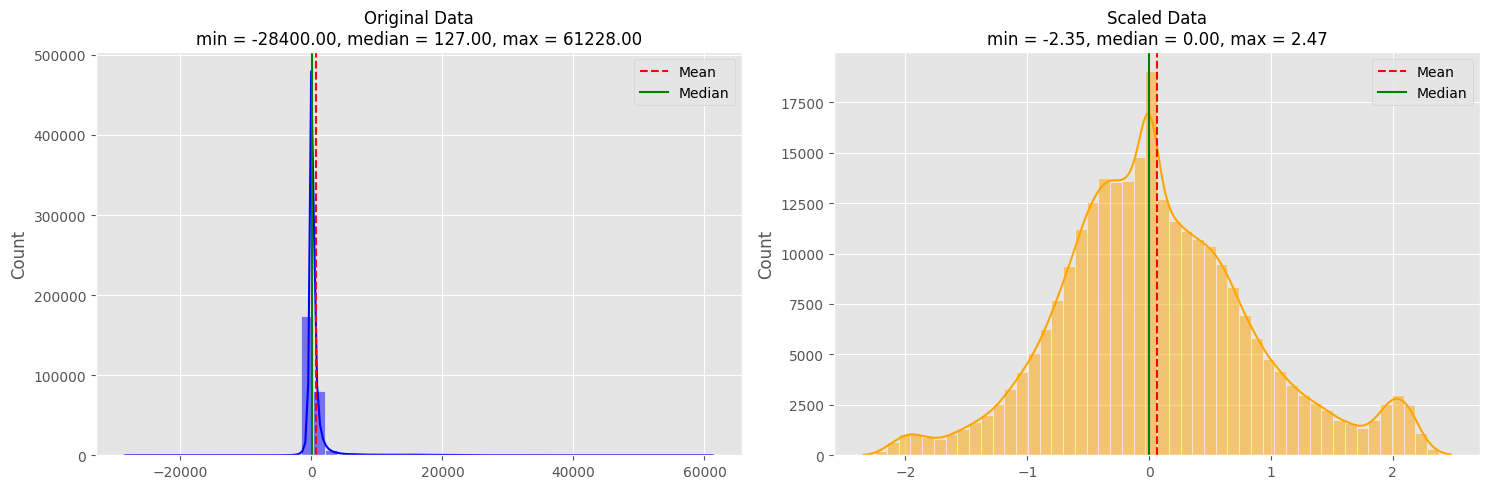

In [ ]:
# Comparison of X_train and X_train_Scaled

fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

# Original Data Distribution
sns.histplot(np.concatenate(X_train.values), ax=ax[0], kde=True, bins=50, color="blue")
ax[0].set_title(
    f"Original Data\n"
    f"min = {np.min(np.concatenate(X_train.values)):.2f}, "
    f"median = {np.median(np.concatenate(X_train.values)):.2f}, "
    f"max = {np.max(np.concatenate(X_train.values)):.2f}",
    fontsize=12
)
ax[0].axvline(np.mean(np.concatenate(X_train.values)), color="red", linestyle="--", label="Mean")
ax[0].axvline(np.median(np.concatenate(X_train.values)), color="green", linestyle="-", label="Median")
ax[0].legend()

# Scaled Data Distribution
sns.histplot(np.concatenate(X_train_scaled), ax=ax[1], kde=True, bins=50, color="orange")
ax[1].set_title(
    f"Scaled Data\n"
    f"min = {np.min(np.concatenate(X_train_scaled)):.2f}, "
    f"median = {np.median(np.concatenate(X_train_scaled)):.2f}, "
    f"max = {np.max(np.concatenate(X_train_scaled)):.2f}",
    fontsize=12
)
ax[1].axvline(np.mean(np.concatenate(X_train_scaled)), color="red", linestyle="--", label="Mean")
ax[1].axvline(np.median(np.concatenate(X_train_scaled)), color="green", linestyle="-", label="Median")
ax[1].legend()

plt.tight_layout()
plt.show()


### **Oversampling**

Oversampling is a method to increase the representation of minority class samples to balance datasets. So, it prevents bias towards the majority class in imbalanced dataset.

**SMOTE**

In this case, we used SMOTE (Synthetic Minority oversampling Technique) as our data contained moderately imbalanced dataset (71.1% ALL vs. 28.9% AML). This SMOTE generated synthetic samples for the minority class (AML) using nearest neighbors.

In [ ]:
# Oversampling (SMOTE)

from sklearn.utils import resample
from collections import Counter

# Defining SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train['cancer'])

print("Before Upsampling:")
print(Counter(y_train['cancer']))

print("After Upsampling:")
print(Counter(y_train_resampled))

Before Upsampling:
Counter({0: 27, 1: 11})
After Upsampling:
Counter({0: 27, 1: 27})


After resampling process with SMOTE, we observed the number of minority class has become similar to the number of majority class.

### **PCA**

Principal Component Analysis (PCA) is A dimensionality reduction technique that transforms correlated features into a smaller set of uncorrelated components. PCA uses linear algebra to transform the dataset into a new feature space (compressed form) where relationships between the original features may not be preserved. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result. In this case we will use it to analyse the feature importance. In overall, this technique is crucial as it can reduce feature space, remove multicollinearity, and overall improves model efficiency.


In [ ]:
X_train_resampled

array([[-1.5248227 , -0.10430839, -0.11111111, ...,  0.71910112,
        -0.14946619, -0.352     ],
       [-0.46099291,  0.62131519,  0.3256705 , ..., -0.40449438,
        -0.47686833,  0.384     ],
       [ 0.43262411,  0.83900227, -1.8045977 , ...,  0.94382022,
        -0.04412811, -0.48      ],
       ...,
       [ 0.70484428, -0.15751325,  0.21597634, ..., -0.38834937,
         1.62910254,  0.22433913],
       [ 1.46962029,  0.02085517, -0.08379668, ..., -0.29907747,
         1.48560715, -1.28855284],
       [ 0.76247989,  0.46328771, -0.03355249, ...,  0.58502336,
         1.26411924, -0.37796867]])

In [ ]:
# Defining PCA
pca = PCA(random_state=0)

# fit PCA to the processed training dataset
pca.fit_transform(X_train_resampled)


array([[ 8.51445444e+00,  1.98683570e+01, -1.83614902e+01, ...,
         4.73382934e-17,  1.65167486e-16, -2.24207509e-17],
       [-7.05097495e+00,  1.27427427e+01,  1.27791475e+01, ...,
         4.73382934e-17,  1.65167486e-16, -2.24207509e-17],
       [ 3.36343672e+01,  2.95498546e+01, -2.55059460e+01, ...,
         4.73382934e-17,  1.65167486e-16, -2.24207509e-17],
       ...,
       [ 1.33186205e+01, -1.82014135e+01,  7.02414866e+00, ...,
        -1.80814573e-15, -1.69583366e-15,  2.40130568e-16],
       [ 7.40549077e-01, -2.20475264e+01, -2.29441818e+01, ...,
        -1.57745859e-16, -1.67341632e-15,  4.20408733e-16],
       [ 1.28838589e+01, -1.50847897e+01, -1.82474975e+01, ...,
        -1.25157454e-15,  6.00937268e-15, -3.03846713e-15]])

In [ ]:
total=sum(pca.explained_variance_)
k=0
current_variance=0
while current_variance/total < 0.95:
    current_variance += pca.explained_variance_[k]
    k=k+1
k

31

In [ ]:
pca = PCA(n_components=k)

In [ ]:
# fit PCA to the train dataset
X_train_pca = pca.fit_transform(X_train_resampled)

# fit PCA to scaled test dataset
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
X_train_pca

array([[  8.51445444,  19.86835704, -18.3614902 , ...,  -0.94605006,
         -4.25407185,   5.30311083],
       [ -7.05097495,  12.74274267,  12.7791475 , ..., -17.53630526,
         -4.15793709,  -5.47311988],
       [ 33.63436718,  29.54985462, -25.50594598, ...,  -2.17600953,
          5.50331146,   0.89214985],
       ...,
       [ 13.3186205 , -18.20141354,   7.02414866, ...,  -1.11445268,
          0.8781008 ,  -0.32707607],
       [  0.74054908, -22.04752642, -22.9441818 , ...,  -0.59124747,
         -0.77548086,   1.77341582],
       [ 12.88385887, -15.08478966, -18.24749754, ...,  -0.25465875,
         -0.94984183,   1.33611603]])

In [ ]:
X_train_resampled.shape

(54, 7129)

In [ ]:
X_train_pca.shape

(54, 31)

In [ ]:
X_test_pca.shape

(34, 31)

**Variances explained by features**

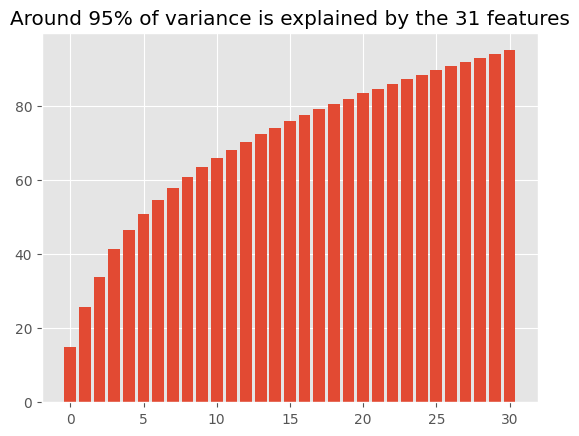

In [ ]:
cum_sum = pca.explained_variance_ratio_.cumsum()
cum_sum = cum_sum*100
plt.bar(range(k), cum_sum)
plt.title(f"Around 95% of variance is explained by the {k} features")
plt.show()

In total, there were 31 features to explain 95% of variance.

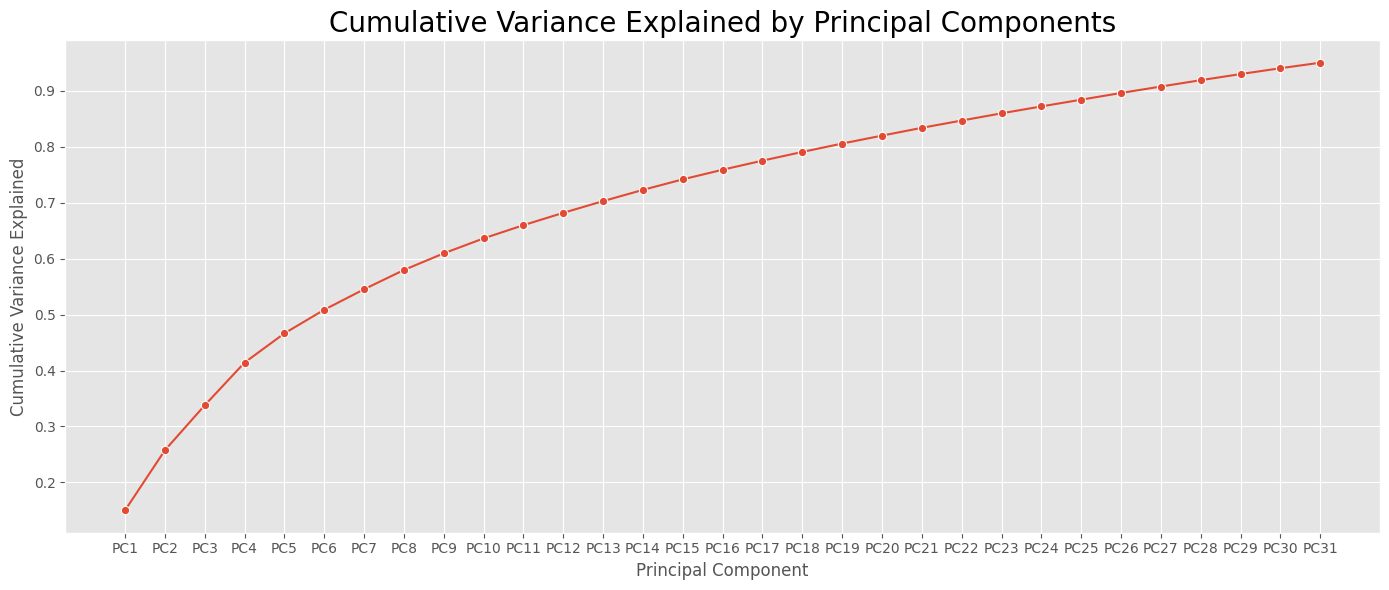

In [ ]:
# Visualization

# Setting size
plt.figure(figsize=(14, 6))

# Convert X_train_scaled to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Create the DataFrame for PCA variance
df_variance_train = pd.DataFrame({
    'PC': range(len(pca.explained_variance_ratio_)),
    'Variance': pca.explained_variance_ratio_,
    'Cumulative Var': pca.explained_variance_ratio_.cumsum()
})

# Create line plot
sns.lineplot(data=df_variance_train, x='PC', y='Cumulative Var', marker='o')

# Generate labels for each PC, starting from 'PC1'
pc_labels = [f'PC{i+1}' for i in df_variance_train['PC']]

# Set x-ticks to match the PCs in your dataframe and use the generated labels
plt.xticks(df_variance_train['PC'], labels=pc_labels)

plt.title('Cumulative Variance Explained by Principal Components', size=20)
plt.xlabel('Principal Component', size=12)
plt.ylabel('Cumulative Variance Explained', size=12)
plt.tight_layout()
plt.show()

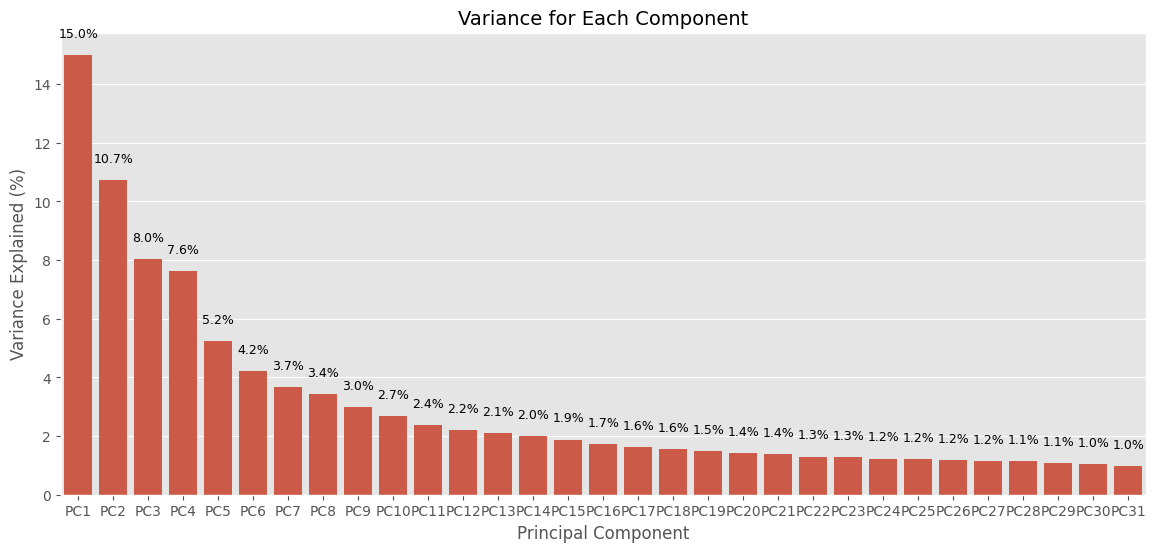

In [ ]:
# Variance explanation for each principal component (in percentage)

# Convert variance to percentage
df_variance_train['Variance'] *= 100

# Variance explanation for each component
plt.figure(figsize=(14, 6))
sns.barplot(data=df_variance_train, x='PC', y='Variance')


# Generate labels for each PC, starting from 'PC1'
pc_labels = [f'PC{i+1}' for i in df_variance_train['PC']]


# Set x-ticks to match the PCs in your dataframe and use the generated labels
plt.xticks(df_variance_train['PC'], labels=pc_labels, size=10)

# Add data labels on top of each bar
for index, row in df_variance_train.iterrows():
    plt.text(
        x=index,  # x-coordinate
        y=row['Variance'] + 0.5,  # y-coordinate (slightly above the bar)
        s=f"{row['Variance']:.1f}%",  # format the label to 1 decimal place with %
        ha='center',  # horizontal alignment
        va='bottom',  # vertical alignment
        fontsize=9  # font size of the label
    )

# Title and labels
plt.title('Variance for Each Component', size=14)
plt.xlabel('Principal Component', size=12)
plt.ylabel('Variance Explained (%)', size=12)

plt.show()


In [ ]:
# PC1 gene components

# Get the PCA components matrix
pca_components = pd.DataFrame(
    pca.components_,  # rows = PCs, columns = original features
    columns=X_train.columns,  # original feature names
    index=[f'PC{i+1}' for i in range(len(pca.components_))]  # PC labels
)

# Extract the loadings for PC1 and sort by importance (absolute value of loadings)
pc1_top_10_features = (
    pca_components.loc['PC1']  # Select PC1
    .abs()  # Take absolute value of the loadings
    .sort_values(ascending=False)[:10]  # Top 10 features with the highest importance
)

# Create a DataFrame for the top 10 features in PC1
pc1_top_10_df = pd.DataFrame({
    "Gene": pc1_top_10_features.index,  # Feature (gene) names
    "Importance value for PC1": pc1_top_10_features.values  # Corresponding loadings
}).reset_index(drop=True)


pc1_top_10_df

,Gene,Importance value for PC1
0,HG2090-HT2152_s_at,0.040970
1,U58048_at,0.036560
2,U34380_rna1_s_at,0.034695
3,L27584_s_at,0.033738
4,U82311_at,0.033611
5,HG371-HT26388_at,0.033075
6,HG2379-HT3996_s_at,0.032845
7,X60188_at,0.032486
8,X80754_at,0.031271
9,D86968_at,0.031260


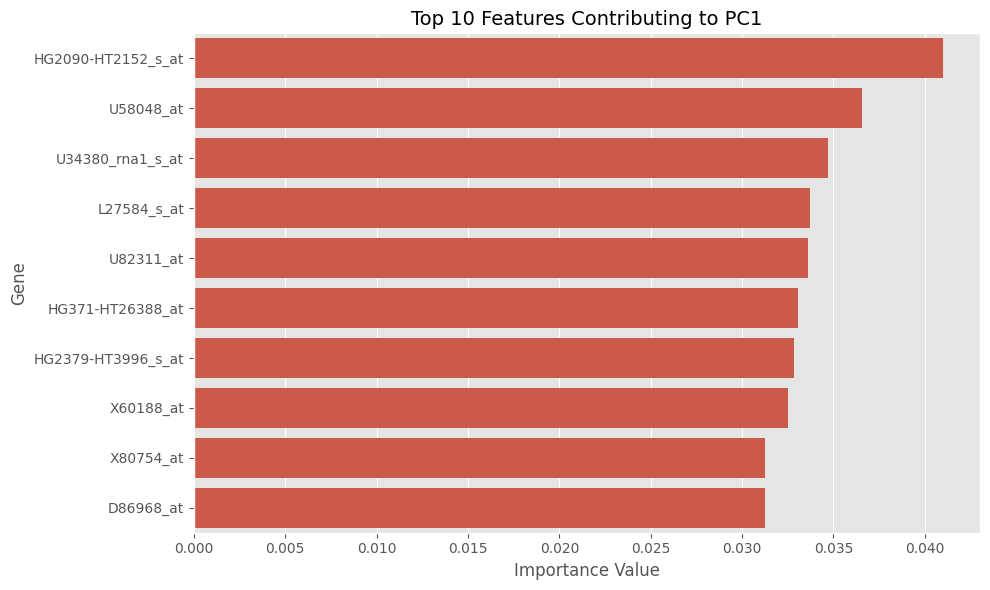

In [ ]:
# Visualization: Top 10 features contributing to PC1
plt.figure(figsize=(10, 6))
sns.barplot(
    data=pc1_top_10_df,
    x="Importance value for PC1",
    y="Gene",
    #palette="viridis"
)
plt.title("Top 10 Features Contributing to PC1", size=14)
plt.xlabel("Importance Value", size=12)
plt.ylabel("Gene", size=12)
plt.tight_layout()
plt.show()

In [ ]:
# PC2 Gene Components

# Get the PCA components matrix
pca_components = pd.DataFrame(
    pca.components_,  # rows = PCs, columns = original features
    columns=X_train.columns,  # original feature names
    index=[f'PC{i+1}' for i in range(len(pca.components_))]  # PC labels
)

# Extract the loadings for PC1 and sort by importance (absolute value of loadings)
pc2_top_10_features = (
    pca_components.loc['PC2']  # Select PC2
    .abs()  # Take absolute value of the loadings
    .sort_values(ascending=False)[:10]  # Top 10 features with the highest importance
)

# Create a DataFrame for the top 10 features in PC2
pc2_top_10_df = pd.DataFrame({
    "Gene": pc2_top_10_features.index,  # Feature (gene) names
    "Importance value for PC2": pc2_top_10_features.values  # Corresponding loadings
}).reset_index(drop=True)


pc2_top_10_df

,Gene,Importance value for PC2
0,M92439_at,0.034468
1,L28010_at,0.034318
2,L42572_at,0.033777
3,U07418_at,0.033774
4,X74801_at,0.033504
5,M91432_at,0.033432
6,J03798_at,0.033369
7,AF015913_at,0.033262
8,M96326_rna1_at,0.033134
9,D63861_s_at,0.033099


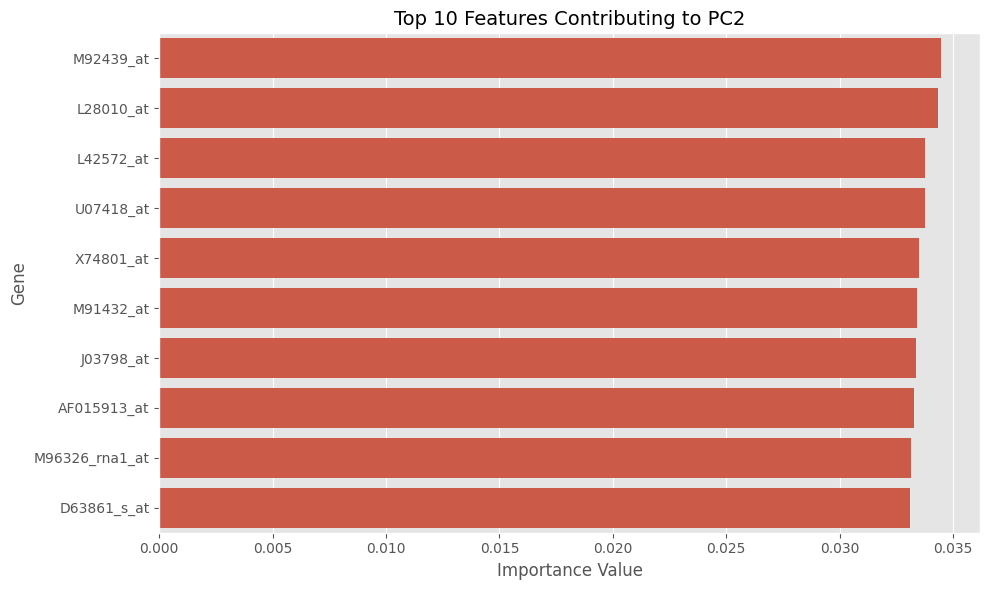

In [ ]:
# Visualization: Top 10 features contributing to PC2
plt.figure(figsize=(10, 6))
sns.barplot(
    data=pc2_top_10_df,
    x="Importance value for PC2",
    y="Gene",
    #palette="viridis"
)
plt.title("Top 10 Features Contributing to PC2", size=14)
plt.xlabel("Importance Value", size=12)
plt.ylabel("Gene", size=12)
plt.tight_layout()
plt.show()

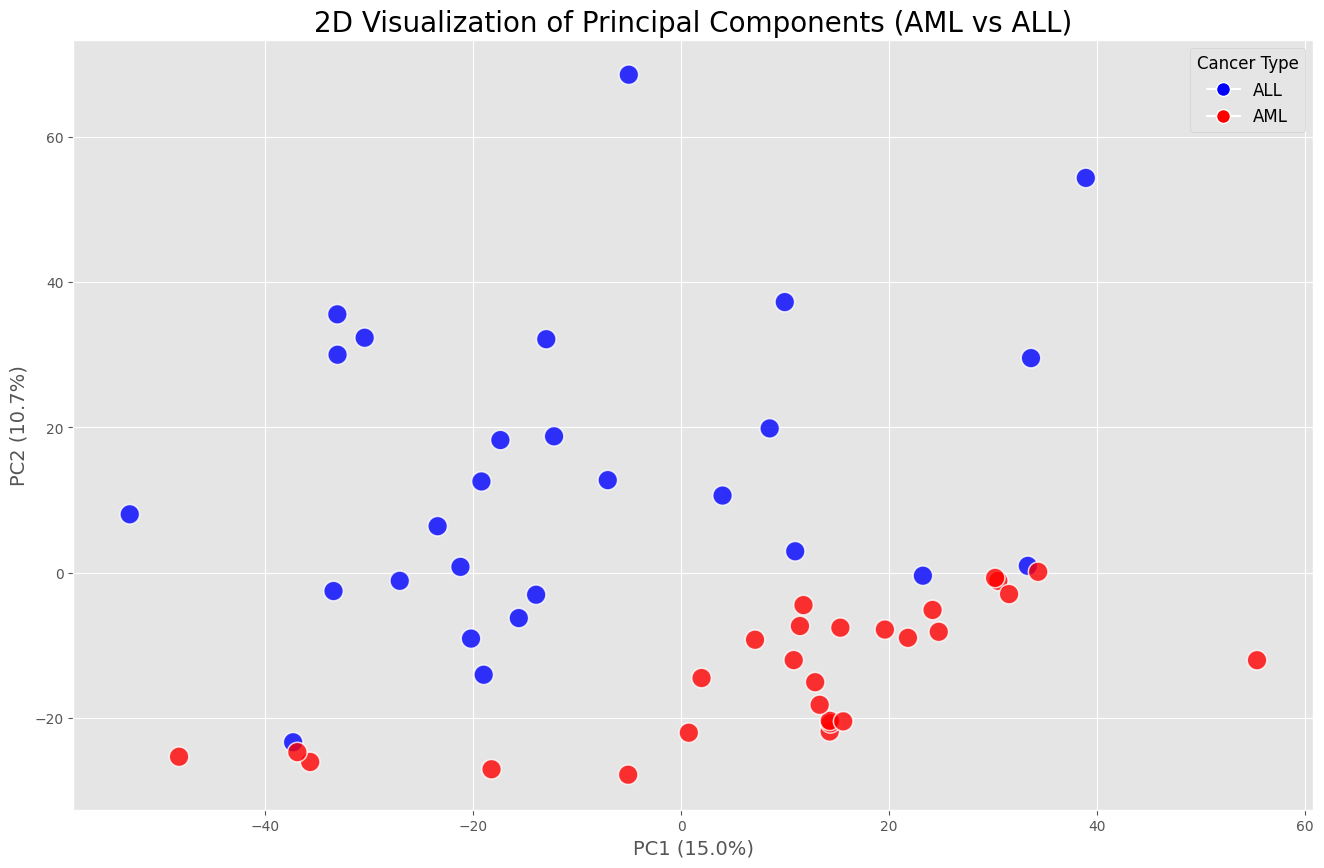

In [ ]:
# 2D PCA Visualization

import matplotlib.lines as mlines

plt.figure(figsize=(16, 10))

# Plotting the PCA-transformed data
sns.scatterplot(
    x=X_train_pca[:, 0],
    y=X_train_pca[:, 1],
    hue=y_train_resampled,  # Using 'cancer' column for hue
    palette={0: 'blue', 1: 'red'},  # Map 0 to blue (ALL) and 1 to red (AML)
    s=200,  # Increase point size for better visibility
    alpha=0.8  # Slight transparency for better visualization
)

# Customize axes labels and title
plt.xlabel(f'PC1 ({round(pca.explained_variance_ratio_[0] * 100, 1)}%)', fontsize=14)
plt.ylabel(f'PC2 ({round(pca.explained_variance_ratio_[1] * 100, 1)}%)', fontsize=14)
plt.title('2D Visualization of Principal Components (AML vs ALL)', fontsize=20)

# Customize the legend
legend_labels = [mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='ALL'),
                 mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='AML')]

plt.legend(handles=legend_labels, title='Cancer Type', fontsize=12, title_fontsize=12)

plt.show()

In [ ]:
# 3D Visualization of Principal Components

# Importing plotly library
import plotly.graph_objects as go

# Extract the first three PCA components from the training dataset (X_train_pca)
pca3 = X_train_pca[:, :3]  # Taking the first three components

# Filter data for ALL (label 0) and AML (label 1)
all_indices = np.where(y_train_resampled == 0)[0]
aml_indices = np.where(y_train_resampled == 1)[0]

# Create a 3D scatter plot
fig = go.Figure()

# Add scatter trace for ALL
fig.add_trace(go.Scatter3d(
    x=pca3[all_indices, 0],  # First PCA component
    y=pca3[all_indices, 1],  # Second PCA component
    z=pca3[all_indices, 2],  # Third PCA component
    mode='markers',
    name='ALL',
    marker=dict(
        size=5,
        color='blue',  # Color for ALL
        opacity=0.8
    )
))

# Add scatter trace for AML
fig.add_trace(go.Scatter3d(
    x=pca3[aml_indices, 0],  # First PCA component
    y=pca3[aml_indices, 1],  # Second PCA component
    z=pca3[aml_indices, 2],  # Third PCA component
    mode='markers',
    name='AML',
    marker=dict(
        size=5,
        color='red',  # Color for AML
        opacity=0.8
    )
))

# Customize layout with titles and axis labels
fig.update_layout(
    title="3D Scatter Plot of PCA Components: ALL vs AML",
    scene=dict(
        xaxis_title="PC1",
        yaxis_title="PC2",
        zaxis_title="PC3"
    ),
    legend=dict(
        title="Leukimia Types:",
        itemsizing='constant'
    )
)

# Show the plot
fig.show()


Now, we will compare the preprocess the data.

In [ ]:
# Preprocessing components for pipeline

# Handling Outlier # Winsorizer
from sklearn.preprocessing import FunctionTransformer
from scipy.stats.mstats import winsorize

# Custom function to apply Winsorizing
def winsorize_transform(X, limits=(0.05, 0.05)):
    """
    Apply Winsorizing to a dataset.

    Parameters:
    - X: numpy array or pandas DataFrame of features.
    - limits: tuple, lower and upper percentile limits for Winsorizing.

    Returns:
    - Transformed array with Winsorized values.
    """
    X_winsorized = np.apply_along_axis(
        lambda col: winsorize(col, limits=limits), axis=0, arr=X
    )
    return X_winsorized

# Define the Winsorizer for the pipeline
winsorizer = FunctionTransformer(winsorize_transform, kw_args={'limits': (0.05, 0.05)})


### **Cross-Validation**

Cross validation is a technique to evaluate model performance by splitting the dataset into training and validation subsets multiple times. This step ensures robust evaluation by mitigating overfitting and providing more reliable performance metric estimatation.

**Preprocessing components**

In [ ]:
# Preprocessing components for pipeline

# Scaling
scaler = RobustScaler()

# Oversampling
smote = SMOTE(random_state=0)

# PCA component
pca = PCA(n_components=k) # k = 31, based on previous result

# Stratified K-Fold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

### **Model benchmarking**

In [ ]:
# List of models to evaluate
models = [
    ('Logistic Regression', LogisticRegression(random_state=0)),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=0)),
    ('Random Forest', RandomForestClassifier(random_state=0)),
    ('AdaBoost', AdaBoostClassifier(random_state=0)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=0)),
    ('CatBoost', CatBoostClassifier(verbose=False, random_state=0)),
    ('XGBoost', XGBClassifier(random_state=0)),
    ('LightGBM', LGBMClassifier(random_state=0, verbose=-1))
]

**Model evaluation on the training dataset**

In [ ]:
# ML Experiments using training dataset

# Results storage
accuracy_mean_pca = []
accuracy_std_pca = []

# Loop through models
for model_name, model in models:
    # Pipeline with PCA
    pipe_model = Pipeline([
        ('handling outlier', winsorizer),
        ('scaler', scaler),
        ('resamplers', smote),
        ('pca', pca),
        ('algo', model)
    ])

    # Perform cross-validation
    model_cv = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train['cancer'],
        cv=skf,
        scoring='accuracy',
        n_jobs=-1
    )

    # Store results
    accuracy_mean_pca.append(round(model_cv.mean(), 3))
    accuracy_std_pca.append(round(model_cv.std(), 3))

# Create a results DataFrame
results_df = pd.DataFrame({
    'model': [
        'Logistic Regression', 'KNN', 'Decision Tree',
        'Random Forest', 'AdaBoost', 'Gradient Boosting',
        'CatBoost', 'XGBoost', 'LightGBM'
    ],
    'accuracy mean (PCA)': accuracy_mean_pca,
    'accuracy std (PCA)': accuracy_std_pca
}).sort_values('accuracy mean (PCA)', ascending=False)

# Displaying dataframe
results_df

,model,accuracy mean (PCA),accuracy std (PCA)
0,Logistic Regression,1.000,0.000
1,KNN,0.943,0.114
3,Random Forest,0.921,0.102
8,LightGBM,0.921,0.102
2,Decision Tree,0.893,0.054
6,CatBoost,0.868,0.080
5,Gradient Boosting,0.868,0.080
7,XGBoost,0.868,0.080
4,AdaBoost,0.818,0.168


**Model evaluation on the training dataset**

In [ ]:
# Predicting to test data

mean_accuracy_test = []

# Searching best models based on testing data set
for model_name, model in models:
     # Pipeline with PCA
    model_pipe = Pipeline([
        ('handling outlier', winsorizer),
        ('scaler', scaler),
        ('resamplers', smote),
        ('pca', pca),
        ('algo', model)
    ])

# fitting
    model_pipe.fit(X_train, y_train['cancer'])

    # predict
    y_pred = model_pipe.predict(X_test)

    # evaluate
    score = round(accuracy_score(y_test['cancer'], y_pred), 3)
    mean_accuracy_test.append(score)

# Model performance comparison
test_result_df =  pd.DataFrame({
    'model' : ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'CatBoost', 'XGBoost', 'LightGBM'],
    'Mean Accuracy - Training Dataset ': accuracy_mean_pca,
    'Mean Accuracy - Testing Dataset': mean_accuracy_test
}).sort_values('Mean Accuracy - Testing Dataset', ascending=False)

# Displaying the result
test_result_df

,model,Mean Accuracy - Training Dataset,Mean Accuracy - Testing Dataset
7,XGBoost,0.868,0.971
8,LightGBM,0.921,0.971
0,Logistic Regression,1.000,0.941
3,Random Forest,0.921,0.941
4,AdaBoost,0.818,0.912
6,CatBoost,0.868,0.912
2,Decision Tree,0.893,0.882
5,GradienBoost,0.868,0.882
1,KNN,0.943,0.824


In [ ]:
# ML Experiments using testing dataset

# Lists to store results
mean_accuracy_test = []
roc_auc_scores = []

# Loop through each model
for model_name, model in models:
    # Pipeline with PCA
    model_pipe = Pipeline([
        ('handling outlier', winsorizer),
        ('scaler', scaler),
        ('resamplers', smote),
        ('pca', pca),
        ('algo', model)
    ])

    # Fit the model
    model_pipe.fit(X_train, y_train['cancer'])

    # Predict on test set
    y_pred = model_pipe.predict(X_test)
    y_pred_proba = model_pipe.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

    # Evaluate accuracy
    score = round(accuracy_score(y_test['cancer'], y_pred), 3)
    mean_accuracy_test.append(score)

    # Evaluate ROC-AUC score
    roc_auc = round(roc_auc_score(y_test['cancer'], y_pred_proba), 3)
    roc_auc_scores.append(roc_auc)

# Model performance comparison
test_result_df = pd.DataFrame({
    'model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'CatBoost', 'XGBoost', 'LightGBM'],
    'Mean Accuracy - Training Dataset ': accuracy_mean_pca,
    'Mean Accuracy - Testing Dataset': mean_accuracy_test,
    'ROC-AUC Score': roc_auc_scores
}).sort_values('Mean Accuracy - Testing Dataset', ascending=False)

# Display the result
test_result_df


,model,Mean Accuracy - Training Dataset,Mean Accuracy - Testing Dataset,ROC-AUC Score
7,XGBoost,0.868,0.971,0.989
8,LightGBM,0.921,0.971,0.989
0,Logistic Regression,1.000,0.941,0.982
3,Random Forest,0.921,0.941,0.986
4,AdaBoost,0.818,0.912,0.961
6,CatBoost,0.868,0.912,0.975
2,Decision Tree,0.893,0.882,0.889
5,GradienBoost,0.868,0.882,0.930
1,KNN,0.943,0.824,0.966


**Model Benchmarking Insights**

**XGBoost** (Training Accuracy: 0.868, Testing Accuracy: 0.971, ROC-AUC: 0.989)
* Strengths: XGBoost demonstrates excellent generalization, achieving the highest testing accuracy and ROC-AUC score among all models. It balances between underfitting and overfitting effectively, making it robust for unseen data.
* Weaknesses: Slight underfitting on the training dataset, which may indicate room for hyperparameter tuning to improve training performance.

**LightGBM** (Training Accuracy: 0.896, Testing Accuracy: 0.971, ROC-AUC: 0.989)
* Strengths: LightGBM matches XGBoost in testing accuracy and ROC-AUC score while showing a slightly better fit during training. It balances performance and generalization, making it an equally strong candidate.
* Weaknesses: None significant, but its slightly higher training accuracy compared to XGBoost may indicate a slightly higher risk of overfitting if not tuned properly.

**Logistic Regression** (Training Accuracy: 1.000, Testing Accuracy: 0.941, ROC-AUC:0.982)
* Strengths: Logistic Regression achieves a good testing accuracy.
* Weaknesses: Perfect training accuracy (score 1.0) indicates overfitting, which reduces reliability for unseen data. It may fail to generalize well to more complex datasets.

**Random Forest** (Training Accuracy: 0.871, Testing Accuracy: 0.941, ROC-AUC: 0.986)
* Strengths: Random Forest achieves strong testing accuracy and high ROC-AUC score with minimal overfitting. It performance is also consistent, making it a reliable choice for robust performance.
* Weaknesses: Slight underfitting during training compared to LightGBM or XGBoost, potentially due to insufficient depth or number of estimators.

**AdaBoost** (Training Accuracy: 0.918, Testing Accuracy: 0.912, ROC-AUC: 0.884)
* Strengths: AdaBoost performs well on training data and provides decent testing accuracy.
* Weaknesses: Lower testing accuracy and ROC-AUC score than XGBoost and LightGBM indicates reduced generalization, potentially due to sensitivity to outliers.

**CatBoost** (Training Accuracy: 0.868, Testing Accuracy: 0.912, ROC-AUC: 0.975)
* Strengths: CatBoost offers balanced performance between training and testing performance, with a high ROC-AUC score (0.975), indicating strong class separation.
* Weaknesses: Testing accuracy is lower than top-performing models, and it may require further tuning for better results.

**Decision Tree** (Training Accuracy: 0.893, Testing Accuracy: 0.882, ROC-AUC: 0.889)
* Strengths: Simple and interpretable, Decision Trees perform decently with acceptable training accuracy.
* Weaknesses:  Moderate ROC-AUC score. Lower testing accuracy and overfitting tendencies, particularly with small datasets.

**Gradient Boosting** (Training Accuracy: 0.868, Testing Accuracy: 0.882, ROC-AUC: 0.930)
* Strengths: Gradient Boosting provides stable training and testing performance with a lower risk of overfitting. Its ROC-AUC score (0.930) is decent but not the highest.
* Weaknesses: Lower testing accuracy compared to XGBoost and LightGBM, and more computationally expensive.

**KNN** (Training Accuracy: 0.943, Testing Accuracy: 0.824, ROC-AUC: 0.966)
* Strengths: KNN achieves high training accuracy and a strong ROC-AUC score, indicating good potential for separating classes.
* Weaknesses: Poor generalization as evidenced by the lowest testing accuracy. It is highly sensitive to feature scaling and parameter selection.

**Recommended Models**

Based on the previous experiment, We will select three models for hyperparameter tunning to further improve the model performance. These models consist of:

1. **XGBoost**

Best overall testing score and ROC-AUC score probably due to strong generalization and robustness, suitable for unseen data.

2. **LightGBM**

Relatively Comparable in accuracy and ROC-AUC to XGBoost, making it an equally strong contender with slightly better training fit.

3. **Random Forest**

Reliable performance with good balance between training and testing accuracy. Although the testing accuracy score is similar to Logistic Regression, this model does not shows the indication of overfitting which logistic regression does. This is a safe choice for robust modeling.


### **Hyperparameter Tunning**

#### **XGBoost**

In [ ]:
# Hyperparameter tuning Xgboost

# Preprocessing
smote = SMOTE(random_state=0)  # SMOTE for balancing
pca = PCA(n_components=k)  # PCA for dimensionality reduction
xgb_clf = XGBClassifier(random_state=0)  # XGBoost classifier

# Defining pipeline
estimator_xgboost = Pipeline([
    ('handling outlier', winsorizer),
    ('scaler', scaler),
    ('resamplers', smote),
    ('pca', pca),
    ('model', xgb_clf)
])

# Adjusted hyperparameter space
hyperparam_space_xgboost = [{
    'model__max_depth': [3, 5, 7, 9],  # Expanding search space
    'model__learning_rate': [0.1, 0.05, 0.01, 0.001],  # Including smaller learning rates
    'model__n_estimators': [100, 150, 200, 250],  # Higher n_estimators for lower learning rates
    'model__subsample': [0.8, 0.9, 1.0],  # Exploring subsample rates
    'model__colsample_bytree': [0.8, 0.9, 1.0],  # Exploring column sampling
    'model__gamma': [0, 0.1, 0.2, 0.5],  # Adding gamma for regularization
    'model__min_child_weight': [1, 2, 3, 4],  # Adding min_child_weight
}]

# Hyperparameter tuning using RandomizedSearchCV
tuned_xgboost = RandomizedSearchCV(
    estimator_xgboost,
    n_jobs=-1,
    param_distributions=hyperparam_space_xgboost,
    scoring='accuracy',
    n_iter=50,
    cv=5,  # Cross-validation folds
    random_state=0,
)

# Fitting the tuned model
tuned_xgboost.fit(X_train, y_train['cancer'])

# Best accuracy score on training set
print(f'Accuracy score - training set: {tuned_xgboost.best_score_:.3f}')
print(f'Best parameters: {tuned_xgboost.best_params_}')

Accuracy score - training set: 0.893
Best parameters: {'model__subsample': 0.8, 'model__n_estimators': 100, 'model__min_child_weight': 1, 'model__max_depth': 3, 'model__learning_rate': 0.05, 'model__gamma': 0, 'model__colsample_bytree': 0.9}


In [ ]:
# Model after hyperparameter tuning
tuned_model_xgboost = tuned_xgboost.best_estimator_

# Fitting model
tuned_model_xgboost.fit(X_train, y_train['cancer'])

# Predict to test set
y_tuned_xgboost = tuned_model_xgboost.predict(X_test)

# Evaluate recall score on test set
test_accuracy = accuracy_score(y_test['cancer'], y_tuned_xgboost)
print(f'Test Accuracy: {test_accuracy:.3f}')

Test Accuracy: 0.971


In [ ]:
# Classification report
print("The Classification Report of XGBoost Classifier")
print(classification_report(y_test['cancer'], y_tuned_xgboost))

The Classification Report of XGBoost Classifier
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.93      0.96        14

    accuracy                           0.97        34
   macro avg       0.98      0.96      0.97        34
weighted avg       0.97      0.97      0.97        34



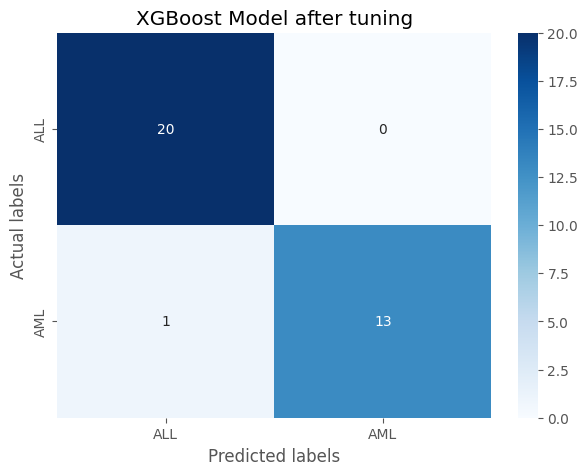

In [ ]:
# Confusion matrix visualization of XGBoost

# Setting size
plt.figure(figsize=(7,5))

# Confusion matrix
ax = sns.heatmap(
    confusion_matrix(y_test['cancer'], y_tuned_xgboost),
    xticklabels=['ALL', 'AML'],  # Custom x-axis labels
    yticklabels=['ALL', 'AML'],   # Custom y-axis labels
    cmap='Blues',
    annot=True,
    fmt='.0f')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
plt.title('XGBoost Model after tuning')
plt.show()


ROC-AUC Score of XGBoost: 0.989


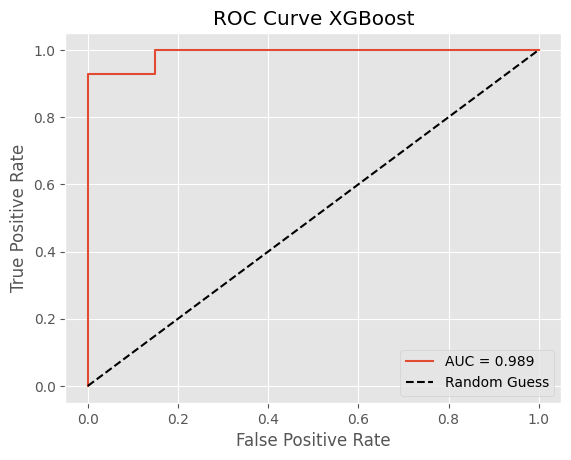

In [ ]:
# ROC_AUC curve XGBOOST

# Predictions
y_pred_proba_xgboost = tuned_model_xgboost.predict_proba(X_test)[:, 1]  # Probability for the positive class

roc_auc_xgboost = round(roc_auc_score(y_test['cancer'], y_pred_proba_xgboost),3)
print("\nROC-AUC Score of XGBoost:", roc_auc_xgboost)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test['cancer'], y_pred_proba_xgboost)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_xgboost}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve XGBoost")
plt.legend(loc="lower right")
plt.show()


#### **LGBM**

In [ ]:
# Hyperparameter Tuning LGBM

# Define pipeline
smote = SMOTE(random_state=0)  # SMOTE for balancing
pca = PCA(n_components=k)  # PCA for dimensionality reduction
lgbm_clf = LGBMClassifier(random_state=0, verbose=-1)  # LightGBM classifier

estimator_lgbm = Pipeline([
    ('handling outlier', winsorizer),
    ('scaler', scaler),
    ('resamplers', smote),
    ('pca', pca),
    ('model', lgbm_clf)
])

# Optimized hyperparameter space (reduced)
hyperparam_space_lgbm = [{
    'model__max_depth': [3, 5, 7],  # maximum_depth of trees
    'model__learning_rate': [0.1, 0.05, 0.01],  # More basic learning rates
    'model__n_estimators': [100, 150, 200],  # Reduced number of estimators
    'model__subsample': [0.8, 1.0],  # Fewer options for subsample
    'model__colsample_bytree': [0.8, 1.0],  # Fewer options for colsample_bytree
    'model__num_leaves': [31, 50],  # LightGBM-specific parameter for leaves
    'model__min_child_samples': [10, 20, 30],  # LightGBM-specific parameter for minimum samples in a leaf
}]

# Hyperparameter tuning using RandomizedSearchCV
tuned_lgbm = RandomizedSearchCV(
    estimator_lgbm,
    n_jobs=-1,
    param_distributions=hyperparam_space_lgbm,
    scoring='accuracy',
    n_iter=50,  # number of iterations
    cv=5,  # cross-validation folds
    random_state=0,
)

# Fitting the tuned model
tuned_lgbm.fit(X_train, y_train['cancer'])

# Best accuracy score on training set
print(f'Accuracy score - training set: {tuned_lgbm.best_score_:.3f}')
print(f'Best parameters: {tuned_lgbm.best_params_}')

Accuracy score - training set: 0.893
Best parameters: {'model__subsample': 1.0, 'model__num_leaves': 31, 'model__n_estimators': 100, 'model__min_child_samples': 10, 'model__max_depth': 7, 'model__learning_rate': 0.05, 'model__colsample_bytree': 1.0}


In [ ]:
# Model evaluation on the test data

# Model after hyperparameter tuning
tuned_model_lgbm = tuned_lgbm.best_estimator_

# Fitting model to training data
tuned_model_lgbm.fit(X_train, y_train['cancer'])

# Predict on test set
y_tuned_lgbm = tuned_model_lgbm.predict(X_test)

# Evaluate accuracy score on test set
test_accuracy_lgbm = accuracy_score(y_test['cancer'], y_tuned_lgbm)
print(f'Test Accuracy: {test_accuracy_lgbm:.3f}')

Test Accuracy: 0.971


In [ ]:
# classification report
print("The Classification Report of LGBM Classifier")
print(classification_report(y_test['cancer'], y_tuned_lgbm))

The Classification Report of LGBM Classifier
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.93      0.96        14

    accuracy                           0.97        34
   macro avg       0.98      0.96      0.97        34
weighted avg       0.97      0.97      0.97        34



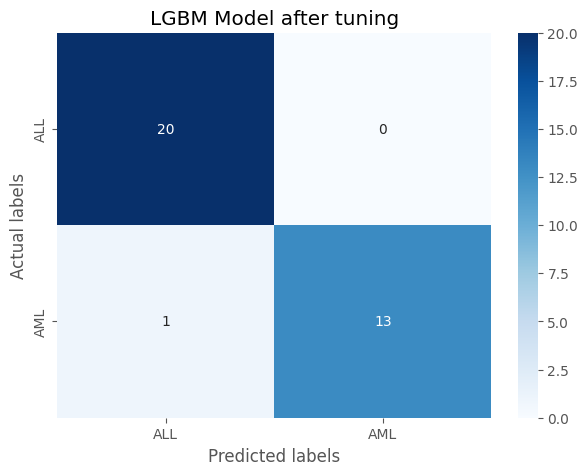

In [ ]:
# Confusion matrix visualization of LGBM

# Setting size
plt.figure(figsize=(7,5))

# Confusion matrix
ax = sns.heatmap(
    confusion_matrix(y_test['cancer'], y_tuned_lgbm),
    xticklabels=['ALL', 'AML'],  # Custom x-axis labels
    yticklabels=['ALL', 'AML'],   # Custom y-axis labels
    cmap='Blues',
    annot=True,
    fmt='.0f'
)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
plt.title('LGBM Model after tuning')
plt.show()

In [ ]:
confusion_matrix(y_test['cancer'], y_tuned_lgbm)

array([[20,  0],
       [ 1, 13]])


ROC-AUC Score: 0.982


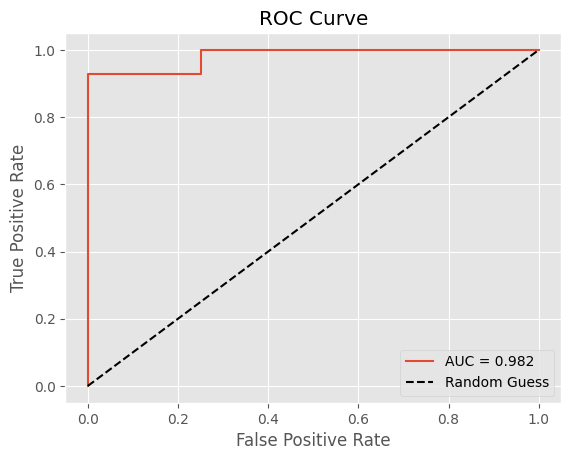

In [ ]:
# ROC_AUC curve
# Predictions
y_pred_proba_lgbm = tuned_model_lgbm.predict_proba(X_test)[:, 1]  # Probability for the positive class

roc_auc_lgbm =round(roc_auc_score(y_test['cancer'], y_pred_proba_lgbm),3)
print("\nROC-AUC Score:", roc_auc_lgbm)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test['cancer'], y_pred_proba_lgbm)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_lgbm}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


#### **Random Forest**

In [ ]:
# Hyperparameter tuning - Random Forest

# Define pipeline
smote = SMOTE(random_state=0)  # SMOTE for balancing
scaler = RobustScaler() # Robust scaler
pca = PCA(n_components=k)  # PCA for dimensionality reduction
rf_clf = RandomForestClassifier(random_state=0)  # Random Forest classifier

estimator_rf = Pipeline([
    ('handling outlier', winsorizer),
    ('scaler', scaler),
    ('resamplers', smote),
    ('pca', pca),
    ('model', rf_clf)
])

# Adjusted hyperparameter space for Random Forest
hyperparam_space_rf = [{
    'model__n_estimators': [100, 200, 300],  # Number of trees
    'model__max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'model__min_samples_split': [2, 5, 10],  # Minimum number of samples to split an internal node
    'model__min_samples_leaf': [1, 2, 4],  # Minimum number of samples per leaf node
    'model__max_features': ['sqrt', 'log2'],  # Number of features to consider at each split
    'model__bootstrap': [True, False],  # Whether bootstrap samples are used
}]

# Hyperparameter tuning using RandomizedSearchCV
tuned_rf = RandomizedSearchCV(
    estimator_rf,
    n_jobs=-1,
    param_distributions=hyperparam_space_rf,
    scoring='accuracy',
    n_iter=50,  # Reduced number of iterations for faster tuning
    cv=5,  # Cross-validation folds
    random_state=0,
)

# Fitting the tuned model
tuned_rf.fit(X_train, y_train['cancer'])

# Best accuracy score on training set
print(f'Accuracy score - training set: {tuned_rf.best_score_:.3f}')
print(f'Best parameters: {tuned_rf.best_params_}')

Accuracy score - training set: 0.975
Best parameters: {'model__n_estimators': 300, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 'log2', 'model__max_depth': 30, 'model__bootstrap': True}


In [ ]:
# Random Forest - Test Dataset
# Model after hyperparameter tuning
tuned_model_rf = tuned_rf.best_estimator_

# Fitting model to training data
tuned_model_rf.fit(X_train, y_train['cancer'])

# Predict on test set
y_tuned_rf = tuned_model_rf.predict(X_test)

# Evaluate accuracy on test set
test_accuracy_rf = accuracy_score(y_test['cancer'], y_tuned_rf)
print(f'Test Accuracy: {test_accuracy_rf:.3f}')

Test Accuracy: 0.971


In [ ]:
# classification report
print("The Classification Report of Random Forest Classifier")
print(classification_report(y_test['cancer'], y_tuned_rf))

The Classification Report of Random Forest Classifier
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.93      0.96        14

    accuracy                           0.97        34
   macro avg       0.98      0.96      0.97        34
weighted avg       0.97      0.97      0.97        34



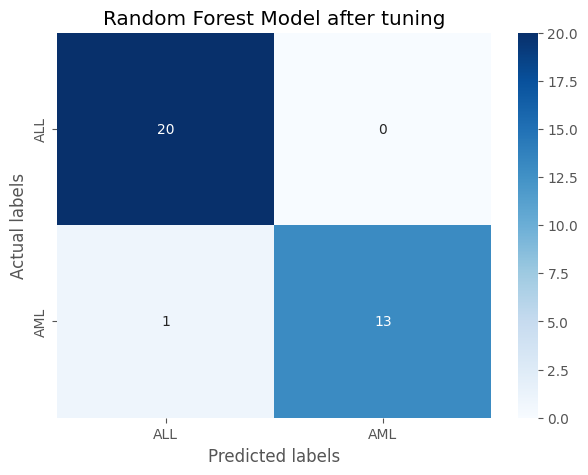

In [ ]:
# Confusion matrix visualization of Random Forest

# Setting size
plt.figure(figsize=(7,5))

# Confusion matrix
ax = sns.heatmap(confusion_matrix(y_test['cancer'], y_tuned_rf),
            xticklabels=['ALL', 'AML'],  # Custom x-axis labels
    yticklabels=['ALL', 'AML'],   # Custom y-axis labels
    cmap='Blues',
    annot=True,
    fmt='.0f'
)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
plt.title('Random Forest Model after tuning')
plt.show()


ROC-AUC Score: 0.993


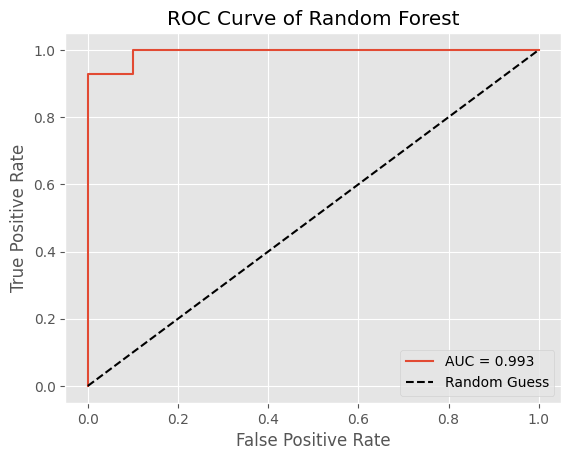

In [ ]:
# ROC_AUC curve

# Predictions
y_pred_proba_rf = tuned_model_rf.predict_proba(X_test)[:, 1]  # Probability for the positive class

roc_auc_rf = round(roc_auc_score(y_test['cancer'], y_pred_proba_rf),3)
print("\nROC-AUC Score:", roc_auc_rf)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test['cancer'], y_pred_proba_rf)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_rf}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of Random Forest")
plt.legend(loc="lower right")
plt.show()


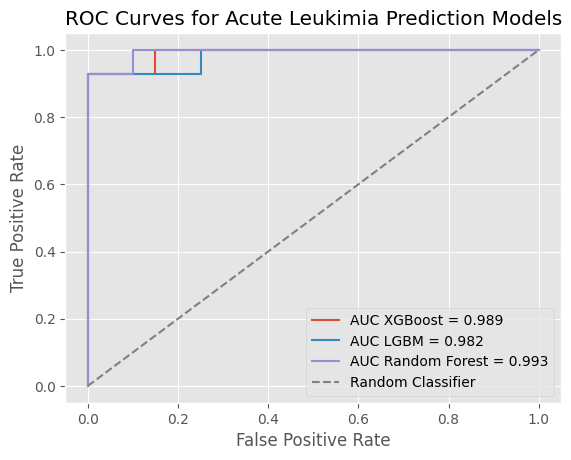

In [ ]:
# Comparison of ROC among models

# ROC graph analysis

def plot_roc_curves(y_test, y_pred_proba_xgboost, y_pred_proba_lgbm, y_pred_proba_rf):

    # Calculate and Plot ROC Curve or Post tuning XGBoost
    fpr_xgboost, tpr_xgboost, _ = roc_curve(y_test, y_pred_proba_xgboost)
    roc_auc_xgboost = round(roc_auc_score(y_test, y_pred_proba_xgboost),3)
    plt.plot(fpr_xgboost, tpr_xgboost, label=f"AUC XGBoost = {roc_auc_xgboost}")

    # Calculate and Plot ROC Curve or Post tuning LGBM
    fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_pred_proba_lgbm)
    roc_auc_lgbm = round(roc_auc_score(y_test, y_pred_proba_lgbm),3)
    plt.plot(fpr_lgbm, tpr_lgbm, label=f"AUC LGBM = {roc_auc_lgbm}")

    # Calculate and Plot ROC Curve or Post tuning Random forest
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
    roc_auc_rf = round(roc_auc_score(y_test, y_pred_proba_rf),3)
    plt.plot(fpr_rf, tpr_rf, label=f"AUC Random Forest = {roc_auc_rf}")

    # Plot random classifier
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

    # Format the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Acute Leukimia Prediction Models')
    plt.legend()
    plt.show()

plot_roc_curves(y_test['cancer'], y_pred_proba_xgboost, y_pred_proba_lgbm, y_pred_proba_rf)

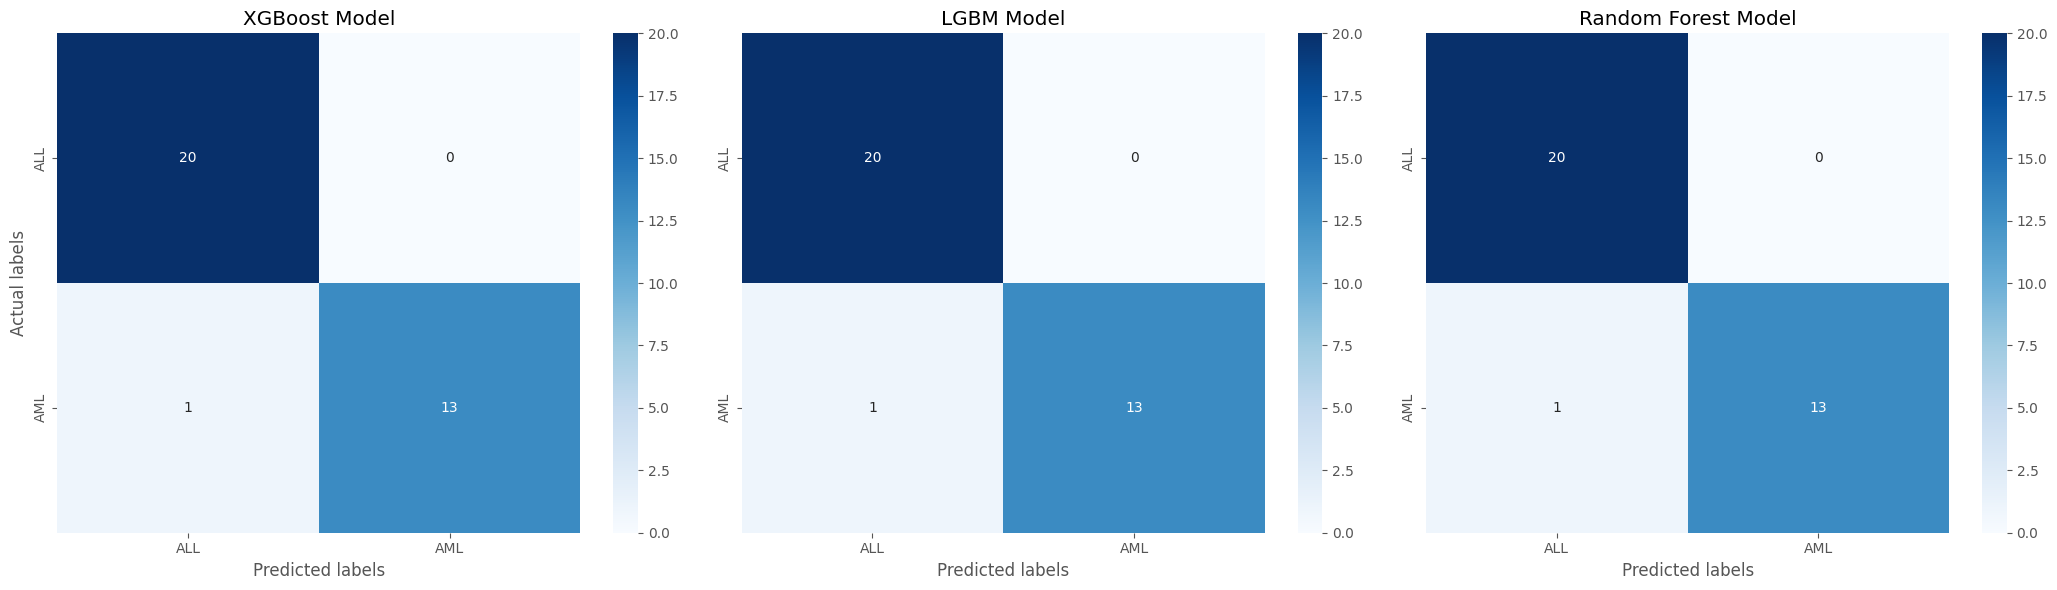

In [ ]:
# Confusion matrix comparison

# Create a figure with 3 subplots in a single row
fig, axes = plt.subplots(1, 3, figsize=(21, 6))  # 1 row, 3 columns, adjust figure size

# XGBoost Confusion Matrix
sns.heatmap(
    confusion_matrix(y_test['cancer'], y_tuned_xgboost),
    annot=True,
    fmt='.0f',
    cmap='Blues',
    xticklabels=['ALL', 'AML'],
    yticklabels=['ALL', 'AML'],
    ax=axes[0]
)
axes[0].set_title('XGBoost Model')
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('Actual labels')

# LGBM Confusion Matrix
sns.heatmap(
    confusion_matrix(y_test['cancer'], y_tuned_lgbm),
    annot=True,
    fmt='.0f',
    cmap='Blues',
    xticklabels=['ALL', 'AML'],
    yticklabels=['ALL', 'AML'],
    ax=axes[1]
)
axes[1].set_title('LGBM Model')
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('')

# Random Forest Confusion Matrix
sns.heatmap(
    confusion_matrix(y_test['cancer'], y_tuned_rf),
    annot=True,
    fmt='.0f',
    cmap='Blues',
    xticklabels=['ALL', 'AML'],
    yticklabels=['ALL', 'AML'],
    ax=axes[2]
)
axes[2].set_title('Random Forest Model')
axes[2].set_xlabel('Predicted labels')
axes[2].set_ylabel('')

# Adjust spacing
plt.tight_layout()
plt.show()


### **Best model selection**

**Overal Accuracy score comparison**

| Model | Conditions | Train score  | Test score |
| --- | --- | --- | ---|
| XGBoost Classifier | Before Tuning |  0.868 | 0.971 |
| XGBoost Classifier |  After Tuning | 0.893 | 0.971 |
| LGBM Classifier | Before Tuning |  0.896 | 0.971 |
| LGBM Forest Classifier |  After Tuning | 0.893 | 0.971 |
| Random Forest Classifier | Before Tuning |  0.871 | 0.941 |
| Random Forest Classifier |  After Tuning | 0.975 | 0.971 |

**Overall ROC AUC score comparison**

| Model | Before Tunning | After Tunning |
| --- | --- | --- |
| XGBoost Classifier |  0.989 | 0.989 |
| LGBM Classifier | 0.989 | 0.982 |
| Random Forest Classifier |  0.986 | 0.993 |



### **Insights of Hyperparameter Tuning**

**Model Performance Analysis (Accuracy & ROC-AUC)**

**XGBoost Classifier**

* Before Tuning: Training accuracy of 0.868 and testing accuracy of 0.971 indicate strong generalization. Furthermore, the ROC-AUC score of 0.989 reflects excellent class discrimination, making it highly reliable for classification.
* After Tuning: Training accuracy increased to 0.893, while testing accuracy remained at 0.971, showing no overfitting and consistent performance. The ROC-AUC score remained steady at 0.989, indicating that tuning did not significantly impact its discriminatory performance.

**LGBM Classifier**

* Before Tuning: Training accuracy of 0.896 and testing accuracy of 0.971 demonstrate strong initial performance. The ROC-AUC of 0.989 highlights its robust ability to differentiate between classes.
* After Tuning: Training accuracy slightly decreased to 0.893, with testing accuracy staying at 0.971, suggesting reduced overfitting. However, the ROC-AUC decreased slightly to 0.982, indicating a slight decline in its ability to discriminate between classes.

**Random Forest Classifier**

* Before Tuning: Training accuracy of 0.871 and testing accuracy of 0.941 indicate moderate underfitting. The ROC-AUC of 0.986 is relatively strong but still lower than XGBoost or LGBM models.
* After Tuning: Training accuracy significantly improved to 0.975, and testing accuracy increased to 0.971, aligning closely with the other models. The ROC-AUC rose to 0.993, making it the highest among all models and showing a marked improvement in class discrimination.


**The final recommendation model**

We select the **post-tuning random forest** as the final model due to the excellent performance of training and testing accuracy that matches XGBoost and LGBM, with the highest ROC-AUC (0.993) that demonstrates high discriminatory power and ensures strong generalization to unseen data.



### **Learning curve**

Learning curve is a graphical representation that shows how a models's performance changes overtime or with amount of training dataset. This technique is used to diagnose the behavior of machine learning algorithms and how well a model is learning based on number of dataset. One of purpose of learning curve is to assess model bias and variance, and determine if adding more data training would improve the model performance.

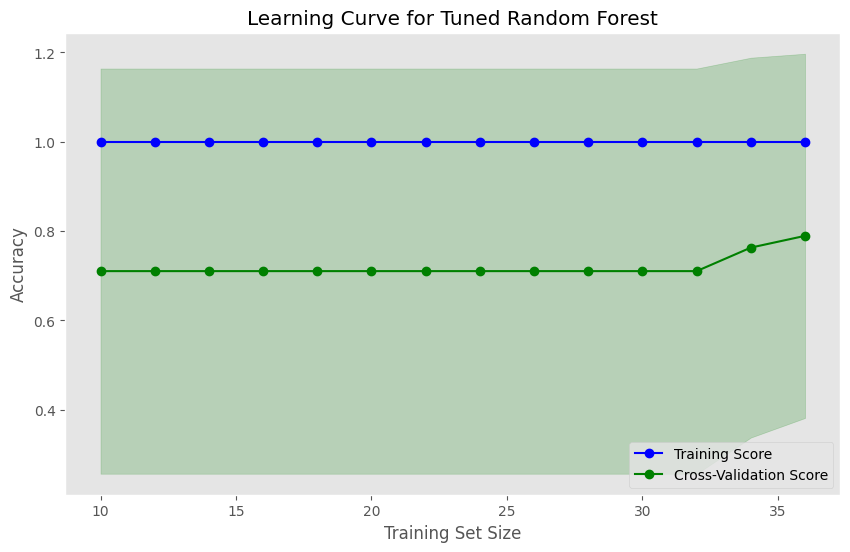

In [ ]:
# Learning curve

from sklearn.model_selection import learning_curve
from sklearn.model_selection import LeaveOneOut

# Define a simpler pipeline for learning curve
simple_rf = Pipeline([
    ('handling outlier', winsorizer),
    ('scaler', scaler),
    ('model', RandomForestClassifier(
        n_estimators=300,
        max_depth=30,
        min_samples_split=5,
        min_samples_leaf=1,
        max_features='log2',
        bootstrap=True,
        random_state=0
    ))
])

# Adjust train_sizes and use LOOCV
train_sizes = np.arange(10, 38, 2)  # Increment by 2 samples
cv = LeaveOneOut()  # Ensure all samples are used

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=simple_rf,
    X=X_train,
    y=y_train['cancer'],
    train_sizes=train_sizes,
    cv=cv,  # Use LOOCV
    scoring='accuracy',
    n_jobs=1
)

# Calculate means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')
plt.title('Learning Curve for Tuned Random Forest')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()


**Learning curve insights: Accuracy**

* The model displays high variance and its overfitting the data. This has been showed by the presence of the gap between the training score and cross validation score. However, this overfitting is expected as the dataset size is small and the model has high complexity (7129 features). This high complexity of the model is the reason we want to simplify it using PCA.
* Additionaly, The cross-validation accuracy starts lower for small training sizes but shows a slight upward improvement trend as the training set size increases. We notice after dataset of 32, we can see improvement trend.

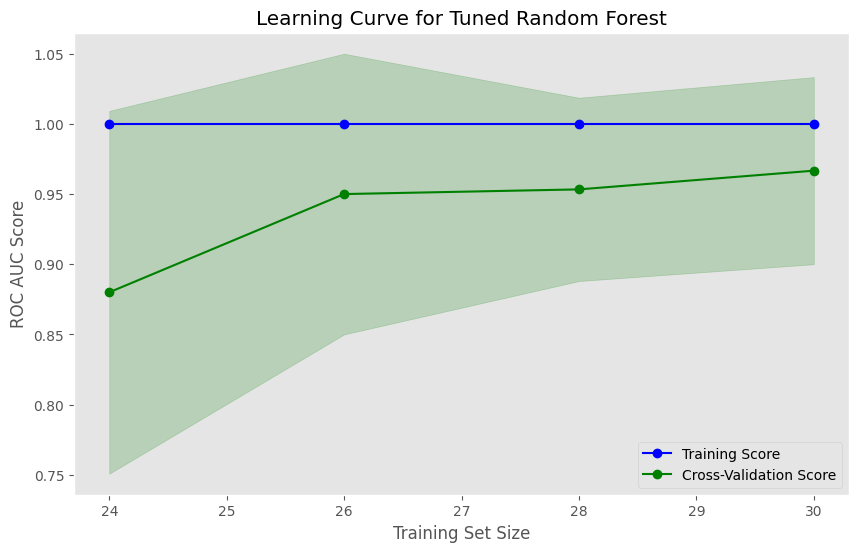

In [ ]:
# Learning curve of ROC_AUC score

# Adjust train_sizes
train_sizes = np.arange(10, 32, 2)  # Increment by 2 samples
cv = 5

# Define a simpler pipeline for generating learning curve
simple_rf = Pipeline([
    ('handling outlier', winsorizer),
    ('scaler', scaler),
    ('model', RandomForestClassifier(
        n_estimators=300,
        max_depth=30,
        min_samples_split=5,
        min_samples_leaf=1,
        max_features='log2',
        bootstrap=True,
        random_state=0
    ))
])

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=simple_rf,
    X=X_train,
    y=y_train['cancer'],
    train_sizes=train_sizes,
    cv=cv,
    scoring='roc_auc',
    n_jobs= 1
)

# Calculate means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')
plt.title('Learning Curve for Tuned Random Forest')
plt.xlabel('Training Set Size')
plt.ylabel('ROC AUC Score')
plt.legend(loc='best')
plt.grid()
plt.show()


**Learning curve insights: ROC AUC Score**

* Similar to the learnig curve using accuracy, the ROC-AUC learning curve also shows overfitting as the dataset is complex with 7129 features.
* However, the cross validation scores shows improvement overtime as long as the training set size increases. The learning curve suggests that as training data increases, the model achieves more stable performance (~0.95 ROC AUC). This indicates that the model is beginning to generalize better despite the dataset's challenges.


**SHAP Explanation**

SHAP or Shapley Additive exPlanations it's a method designed to help us interpret the machine learning models. SHAP is based on a concept from cooperative game theory called Shapley values, which were originally used to fairly distribute payoffs among players in a game. To put it simple, SHAP values tell how much each feature in the dataset contributes to the prediction of the model - whether it is pushing the prediction higher or pulling it down.

In [ ]:
# Shap values
# Access the best estimator from RandomizedSearchCV
best_pipeline = tuned_rf.best_estimator_

# Extract the Random Forest model from the pipeline
rf_model = best_pipeline.named_steps['model']  # Replace 'model' with the actual step name in your pipeline

# Create a SHAP explainer for the extracted Random Forest model
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the training set
shap_values_test = explainer.shap_values(X_test_pca)  # Using PCA-transformed data


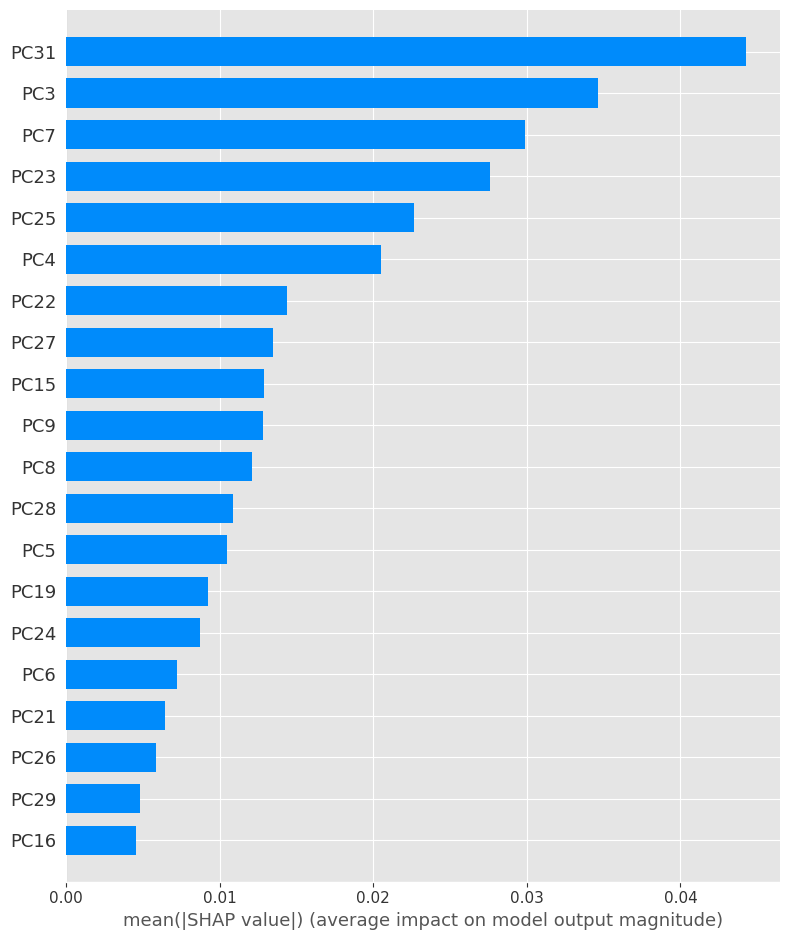

In [ ]:
# SHAP summary plot

# SHAP Extraction
# Assuming 'shap_values' has a shape of (54, 31, 2), we need to extract the SHAP values for the positive class (index 1)
shap_values_pos_class_test = shap_values_test[1]  # Extract the SHAP values for the positive class (binary classification)

# If the shape is still (31, 2), we may need to transpose or fix the indexing
shap_values_pos_class_test = shap_values_pos_class_test.T  # Transpose the array to match the feature set

# Now, the shape should be (54, 31), matching the feature set in X_train_pca

# Set feature names if necessary (e.g., PCA components)
feature_names = [f"PC{i+1}" for i in range(X_test_pca.shape[1])]

# Plot the SHAP summary plot for the positive class
shap.summary_plot(shap_values_pos_class_test, X_test_pca, feature_names=feature_names, plot_type="bar")


The SHAP summary bar above plot displays the importance of the principal components (PCs) in terms of their average impact on the model's output. The higher positions of PC represent the higher overall SHAP values on global level or across all predictions (negative and positive or ALL and AML).

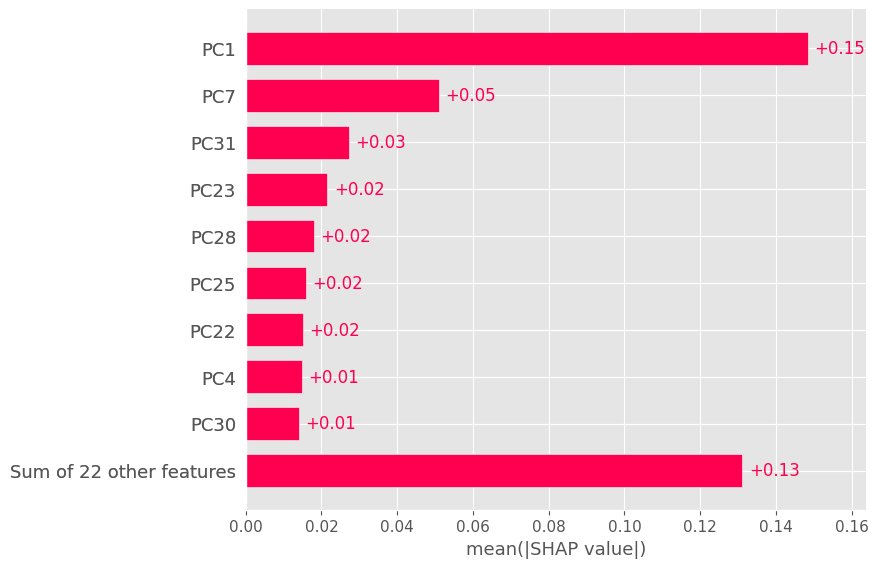

In [ ]:
# Extract SHAP values for the positive class
shap_values_pos_class_test = shap_values_test[..., 1]  # Extract SHAP values for positive class (last axis)

# Ensure SHAP values and data have matching shapes
assert shap_values_pos_class_test.shape == X_test_pca.shape, "Shapes must match"

# Create an Explanation object
shap_explanation_test = shap.Explanation(
    values=shap_values_pos_class_test,
    base_values=explainer.expected_value[1],  # Expected value for the positive class
    data=X_test_pca,  # PCA-transformed dataset
    feature_names=[f"PC{i+1}" for i in range(X_test_pca.shape[1])]  # PCA component names
)

# Plot the SHAP bar graph
shap.plots.bar(shap_explanation_test)

**Bar Plot Insights**

This bar plot SHAP focusses specifically on the positive class (AML).

**Top most important features**
* **PC1**: This feature has the highest mean SHAP value (~0.12), indicating it is the most influential in determining whether a patient has AML (1) or ALL (0).
* **PC7**: This feature is the second most important, with a mean SHAP value of ~0.05.
* Both PC1 and PC7 capture critical variance in the gene expression data, making them key predictors in the model for distinguishing between AML and ALL.
* The other features, such as PC31, PC23, etc, have lower mean values (~0.03 or less), contributing relatively small to the model's prediction.

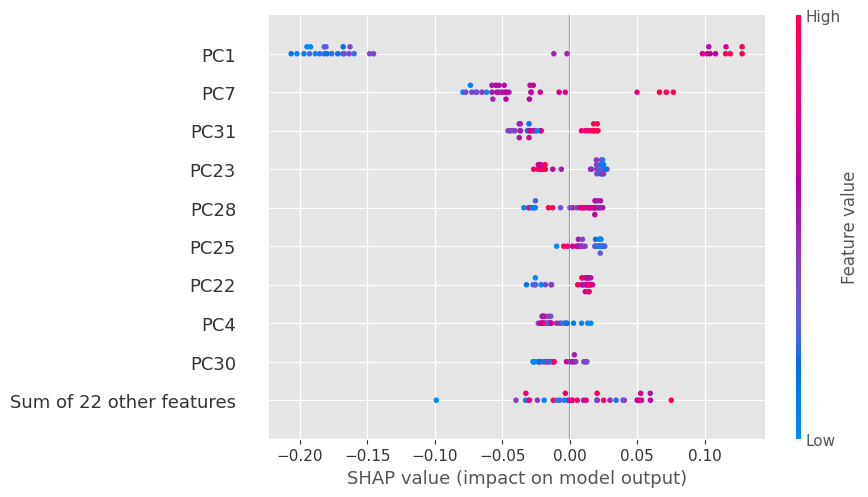

In [ ]:
# Plot the SHAP beeswarm plot
shap.plots.beeswarm(shap_explanation_test)

**Beeswarm plot insights**

The beeswarm plot highlights how each feature impacts individual predictions, showing the spread of SHAP values for each feature across all samples.

**Top important features**
* **PC1** and **PC7** are again identified as the most critical features, with PC1 being the dominant factor influencing predictions.
* PCI Shows a wide range of SHAP values, spanning both positive and negative impacts on model predictions. The gradient in the feature value (from blue to pink) suggests that higher values of PC1 push predictions towards AML (1), while lower values lean towards ALL (0).
* PC7 Also shows variability in SHAP values, but with a smaller range compared to PC1.



**PC gene components**

Based on previous step, we know that both PC1 and PC7 are the most important features for model prediction. In this step, we want to breakdown the original features or gene components that contributes to principal components, PC1 and PC7.

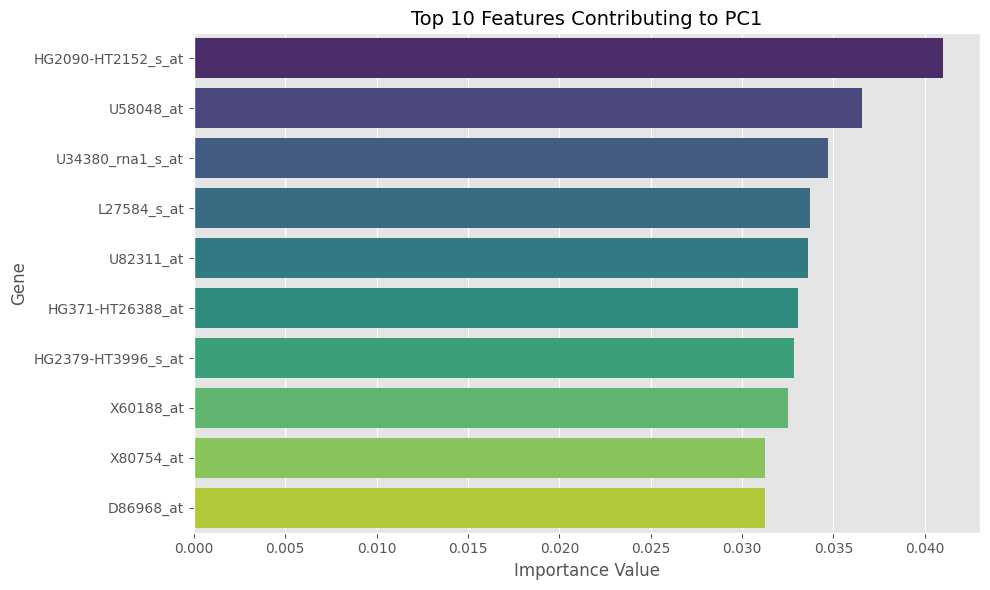

In [ ]:
# PC 1 components

from sklearn.decomposition import PCA
pca = PCA(n_components=k)

# Fit PCA on the preprocessed training data before PCA
pca.fit(X_train_resampled)

# `original_features` contains the column names of the dataset before PCA
original_features = X_train.columns  # X_test from original dataset before PCA

# Get the PCA components matrix
pca_components = pd.DataFrame(
    pca.components_,  # rows = PCs, columns = original features
    columns=original_features,  # Use the original feature names
    index=[f'PC{i+1}' for i in range(len(pca.components_))]  # PC labels
)

# Extract the loadings for PC1 and sort by importance (absolute value of loadings)
pc1_top_10_features = (
    pca_components.loc['PC1']  # Select PC1
    .abs()  # Take absolute value of the loadings
    .sort_values(ascending=False)[:10]  # Top 10 features with the highest importance
)

# Create a DataFrame for the top 10 features in PC1
pc1_top_10_df = pd.DataFrame({
    "Gene": pc1_top_10_features.index,  # Feature (gene) names
    "Importance value for PC1": pc1_top_10_features.values  # Corresponding loadings
}).reset_index(drop=True)

# Visualization: Top 10 features contributing to PC1
plt.figure(figsize=(10, 6))
sns.barplot(
    data=pc1_top_10_df,
    x="Importance value for PC1",
    y="Gene",
    palette="viridis"
)
plt.title("Top 10 Features Contributing to PC1", size=14)
plt.xlabel("Importance Value", size=12)
plt.ylabel("Gene", size=12)
plt.tight_layout()
plt.show()

**PC1 Constituents**

There are many genes that contribute to PC1. We will highlight 10 most important genes that contributes to model. These genes have variety of functions that intersect with mechanisms of leukimia development, such as disrupted cell signaling, metabolism, immune evasion, and uncontrolled proliferation. Some genes (like U82311_at and D86968_at) may serve as novel biomarkers, requiring further investigation to fully understand their roles. These genes and their function can be seen on table below



| Gene Code                | Gene Name                                    | Gene Function                                                                                      | Role in Model Prediction              |
|--------------------------|----------------------------------------------|----------------------------------------------------------------------------------------------------|---------------------------------------|
| HG2090-HT2152_s_at       | External Membrane Protein, 130 KDa          | Involved in cellular membrane processes.                                                          | Cellular interactions and signaling. |
| U58048_at                | PRSM1 Metallopeptidase 1 (33 kD)            | Enzyme involved in protein degradation and turnover.                                               | Protein turnover in cancer cells.    |
| U34380_rna1_s_at         | TEC (Tyrosine Kinase) Gene                  | Tyrosine kinase implicated in signal transduction pathways.                                        | Cancer cell signaling.               |
| L27584_s_at              | Calcium Channel Beta3 Subunit               | Modulates calcium ion transport in cells.                                                         | Calcium signaling in leukemia cells. |
| U82311_at                | Unknown Protein                             | Unknown function, possibly novel or poorly characterized protein.                                  | Potential marker or unknown role.    |
| HG371-HT26388_at         | Mucin 1, Epithelial, Alt. Splice 9          | Glycoprotein associated with cellular adhesion and immune evasion.                                 | Immune evasion in leukemia cells.    |
| HG2379-HT3996_s_at       | Serine Hydroxymethyltransferase, Cytosolic  | Key enzyme in one-carbon metabolism and nucleotide biosynthesis.                                   | Supports rapid cancer cell growth.   |
| X60188_at                | Extracellular Signal-Regulated Kinase 1     | Critical in the MAPK pathway for cellular growth and survival.                                     | Promotes leukemia progression.       |
| X80754_at                | GTP-binding Protein                         | Involved in signal transduction, regulating cellular processes like growth and differentiation.    | Cancer cell growth and signaling.    |
| D86968_at                | KIAA0213 Gene                               | Gene with partial characterization, possibly linked to cell structure or signaling.                | Potentially supports cancer cell survival. |


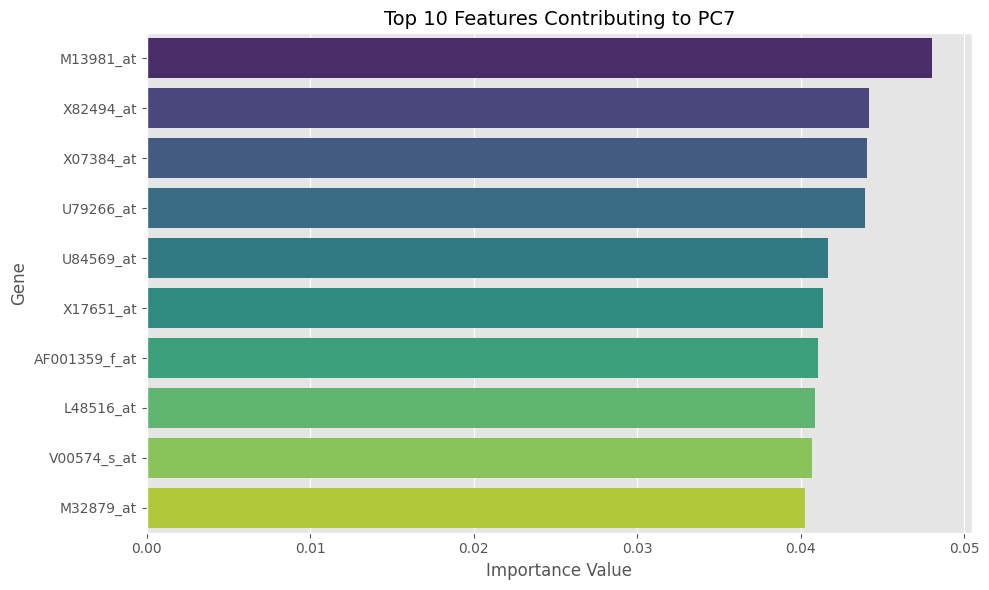

In [ ]:
# PC 7 components

from sklearn.decomposition import PCA
pca = PCA(n_components=k)

# Fit PCA on the preprocessed training data before PCA
pca.fit(X_train_resampled)

# `original_features` contains the column names of the dataset before PCA
original_features = X_train.columns  # X_test from original dataset before PCA

# Get the PCA components matrix
pca_components = pd.DataFrame(
    pca.components_,  # rows = PCs, columns = original features
    columns=original_features,  # Use the original feature names
    index=[f'PC{i+1}' for i in range(len(pca.components_))]  # PC labels
)

# Extract the loadings for PC7 and sort by importance (absolute value of loadings)
pc7_top_10_features = (
    pca_components.loc['PC7']  # Select PC7
    .abs()  # Take absolute value of the loadings
    .sort_values(ascending=False)[:10]  # Top 10 features with the highest importance
)

# Create a DataFrame for the top 10 features in PC7
pc7_top_10_df = pd.DataFrame({
    "Gene": pc7_top_10_features.index,  # Feature (gene) names
    "Importance value for PC7": pc7_top_10_features.values  # Corresponding loadings
}).reset_index(drop=True)

# Visualization: Top 10 features contributing to PC7
plt.figure(figsize=(10, 6))
sns.barplot(
    data=pc7_top_10_df,
    x="Importance value for PC7",
    y="Gene",
    palette="viridis"
)
plt.title("Top 10 Features Contributing to PC7", size=14)
plt.xlabel("Importance Value", size=12)
plt.ylabel("Gene", size=12)
plt.tight_layout()
plt.show()


**PC7 Constituents**

PC7 are crucial components after PC1. These PC also contains some genes that relevant to our leukimia model prediction. These genes can be seen on table below.


| Gene Code        | Gene Name                            | Gene Function                                                                 | Role in Model Prediction                |
|-------------------|--------------------------------------|-------------------------------------------------------------------------------|-----------------------------------------|
| M13981_at        | INHA Inhibin, alpha                 | Regulates hormone production and inhibits cell growth, linked to cancer progression | Regulation of cell growth in leukemia  |
| X82494_at        | FBLN2 Fibulin 2                     | Involved in extracellular matrix organization and cell adhesion                | ECM remodeling relevant to cancer cells|
| X07384_at        | GLI Glioma-associated oncogene       | Zinc finger transcription factor, regulates cell proliferation and differentiation | Oncogene associated with leukemia      |
| U79266_at        | Clone 23627 mRNA                    | Unknown function                                                              | Potentially linked to leukemia          |
| U84569_at        | YF5 mRNA                            | Unknown function                                                              | Potential role in leukemia development  |
| X17651_at        | MYOG Myogenin (myogenic factor 4)   | Regulates muscle differentiation                                              | May indicate differentiation state in leukemia |
| AF001359_f_at    | DNA mismatch repair protein (hMLH1) | Plays a role in DNA repair and genomic stability                               | Genomic stability linked to cancer prevention|
| L48516_at        | Paraoxonase 3 (PON3)                | Antioxidant enzyme, protects cells from oxidative damage                       | Oxidative stress in cancer progression  |
| V00574_s_at      | c-Ha-ras1 proto-oncogene            | Proto-oncogene, involved in cell signaling and proliferation                   | Key oncogene in leukemia pathogenesis  |
| M32879_at        | CYP11B1 Cytochrome P450 11 beta     | Enzyme involved in steroid metabolism                                         | Hormonal regulation linked to cancer    |


**Tree Plot or Tree map logic Model Explanation**

This plot tree explains the logic of how one of the trees in the random forest model is working. The tree logic of the first tree in our random forest model can be seen as below.

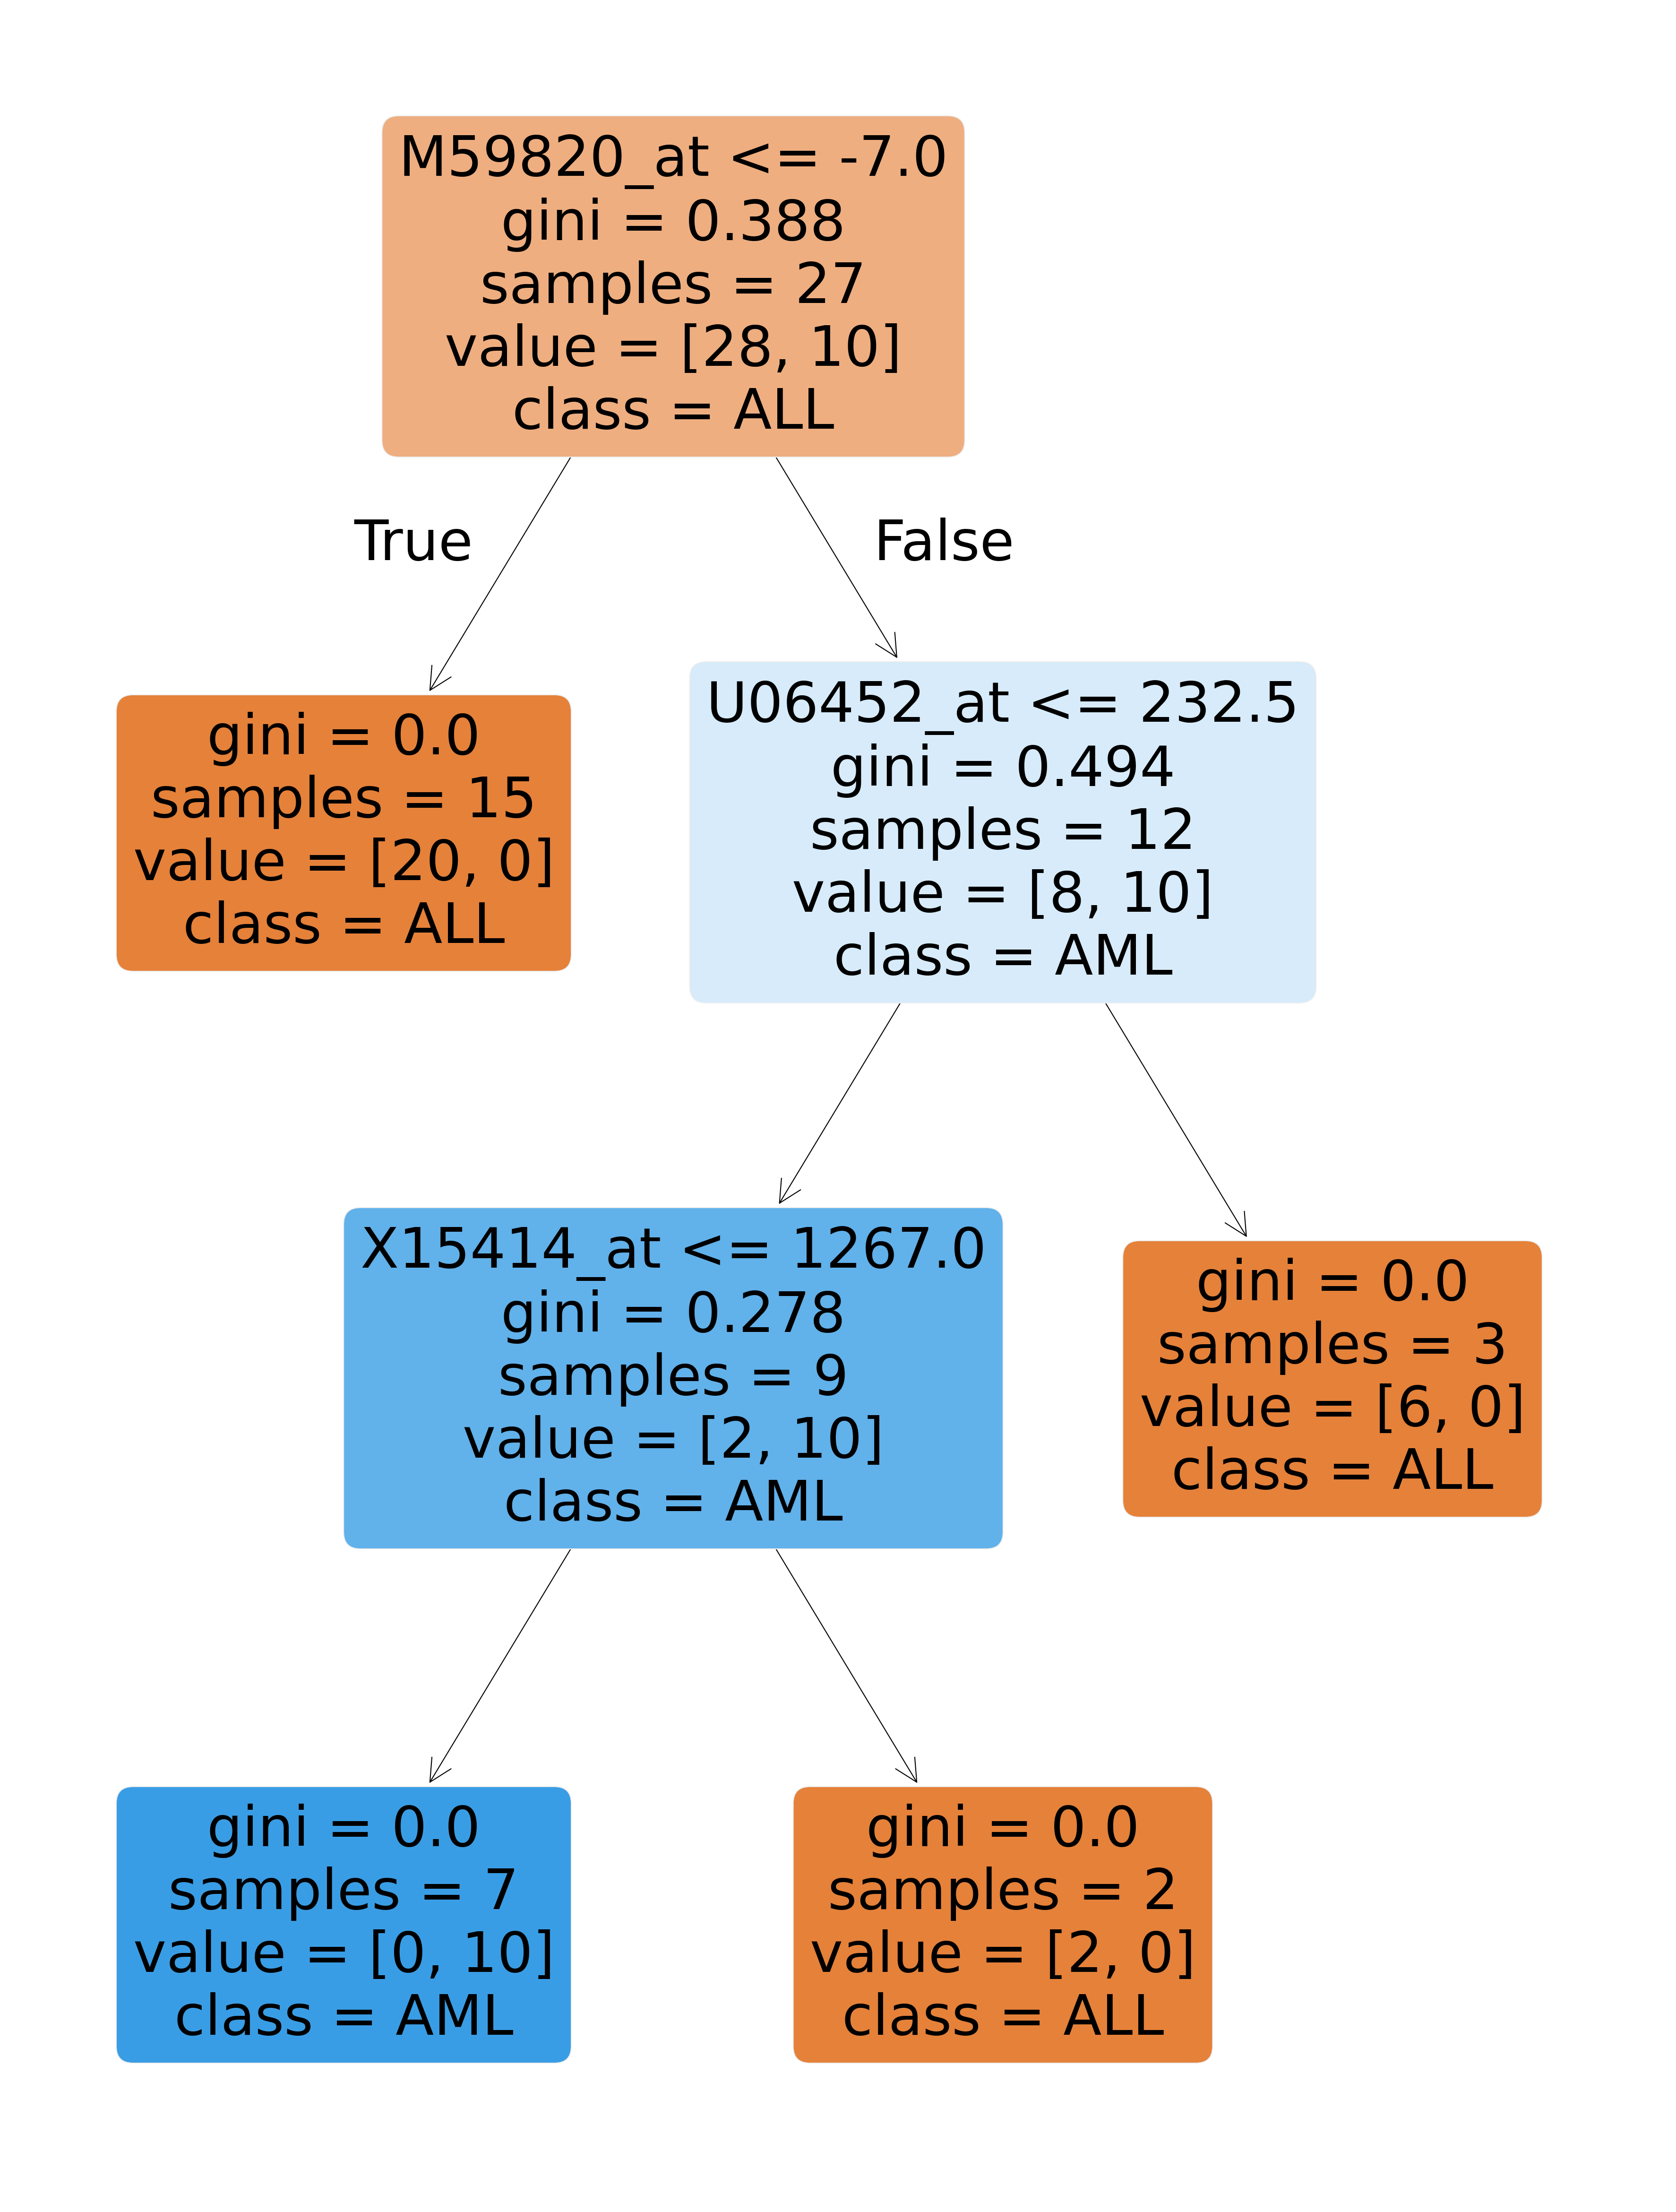

In [ ]:
# Tree map logic

from sklearn.tree import plot_tree

# Random Forest model
clf_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=30,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='log2',
    bootstrap=True,
    random_state=0
)

# Train the model
clf_rf.fit(X_train, y_train['cancer'])

# Plot a single decision tree from the Random Forest
fig, ax = plt.subplots(figsize=(15, 20), dpi=300)  # Customize size and resolution
plot_tree(
    clf_rf.estimators_[0],  # Access the first tree in the forest
    feature_names=X_train.columns if hasattr(X_train, 'columns') else None,  # Use column names if available
    class_names=["ALL", "AML"],
    filled=True,
    rounded=True,
    ax=ax
)

# Show the plot
plt.show()

**Treeplot insights of the first tree of the Random Forest model**

Based on the plot tree above we can see some genes are important for classifying AML and ALL.

* **Most important feature: M59820_at**
* M59820_at is a gen of **CSF3R Colony stimulating factor 3 receptor (granulocyte)**. Based on Zhang et al (2018), this gen are frequently associated with abnormalities of certain genes genes in acute myeloid leukemia. Based on our model, M59820_at is the most important feature for distinguishing between AML and ALL.
* When the expression of CSF3R is very low (≤ -7.0), the node becomes pure with all samples classified as ALL. This suggests that low expression of CSF3R is highly indicative of ALL.
* If the gene expression for M59820_at is less than or equal to -7.0, the sample is classified as ALL (go to the True branch). If it is greater than -7.0, the model checks the next secondary features (go to the False branch). Secondary features (U06452_at and X15414_at) are used for the classification for cases where M59820_at is inconclusive.

* **Secondary features: U06452_at and X15414_at**
* **U06452_at** or gen of **MLANA Differentiation antigen melan-A**  is primarily associated with melanocyte differentiation and is a key antigen in melanoma research. MLANA expression could indicate abnormalities in differentiation or gene dysregulation more commonly associated with lymphoid-lineage malignancies like ALL.
* **X15414_at** or gen of **ALDR1 Aldehyde reductase 1 (low Km aldose reductase)** is an enzyme involved in the detoxification of aldehydes produced during oxidative stress. It plays a protective role in cellular metabolism. Differential expression of ALDR1 in response to oxidative stress could distinguish AML from ALL, as they have different metabolic and oxidative stress profile.

**Tree Logic summary**
1. If M59820_at <= -7.0 → ALL.
2. If M59820_at > -7.0
    * If U06452_at <= 232.5:
        * If X15414_at <= 1267.0 → AML.
        * If X15414_at > 1267.0 → ALL.
    * If U06452_at > 232.5 → ALL.

## **Conclusion**

* The complexity and high number of features from Gene expression dataset have been reduced by using PCA technique from 7129 features into 31 features.
* The prediction model has been built using the post tunning random forest model that shows excellent performance on testing dataset (0.971 accuracy). This result matches the other high performing models, such as XGBoost and LGBM. Additionaly, this model achieves the highest ROC-AUC score (0.993) that also demonstrates high discriminatory power and ensures strong generalization to unseen data.
* The best parameters of this tuned random forest model consist of,
  * n_estimators: 300
  * min_samples_split: 5
  * min_samples_leaf: 1
  * max_features': 'log2'
  * max_depth': 30
  * model__bootstrap': True
* Based on the SHAP explanation model, the most importance features come from principal components of PC1 and PC7.
  * PC1 contain several genes such as HG2090-HT2152_s_at (External Membrane Protein, 130 Kda (Gb:Z22971)), U58048_at (PRSM1 Metallopeptidase 1 (33 kD)), U34380_rna1_s_at (TEC gene extracted from Human protein tyrosine kinase TEC (tec) gene), L27584_s_at (CAB3b mRNA for calcium channel beta3 subunit), U82311_at (GB DEF = Unknown protein mRNA, partial cds), HG371-HT26388_at (Mucin 1, Epithelial, Alt. Splice 9), HG2379-HT3996_s_at (Serine Hydroxymethyltransferase, Cytosolic, Alt. Splice 2), X60188_at (Extracellular signal-regulated Kinase 1 gene)
X80754_at (GTP-binding protein), D86968_at (KIAA0213 gene, partial cds)
  * PC7 contain several genes such as M13981_at (INHA Inhibin, alpha gene),	X82494_at (FBLN2 Fibulin 2 gene), X07384_at (GLI Glioma-associated oncogene homolog (zinc finger protein) gene),	U79266_at (Clone 23627 mRNA gene), U84569_at (YF5 mRNA gene), X17651_at (MYOG Myogenin (myogenic factor 4) gene), AF001359_f_at (GB DEF = DNA mismatch repair protein (hMLH1) mRNA gene), L48516_at (GB DEF = Paraoxonase 3 (PON3) mRNA gene),	V00574_s_at (genomic clones lambda-[SK2-T2, HS578T]; cDNA clones RS-[3,4, 6]) c-Ha-ras1 proto-oncogene, M32879_at (CYP11B1 Cytochrome P450 11 beta gene)
